# Visualisations

This notebook was used for the analysis, proper - assuming that the earlier stages had been successful in 
cleaning the data.

In [1]:
# Imports 
import calendar
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from datetime import datetime
from matplotlib.lines import Line2D  
from pandas.tools.plotting import scatter_matrix
from scipy import stats

In [2]:
# Library versions, for info
print ('Developed with the following library versions:')
print ('Matplotlib:\t\x1b[34m%s\x1b[0m' % (matplotlib.__version__))
print ('Numpy:\t\t\x1b[34m%s\x1b[0m' % (np.version.version))
print ('Python:\t\t\x1b[34m%s\x1b[0m' % (sys.version))
print ('Pandas:\t\t\x1b[34m%s\x1b[0m' % (pd.__version__))
print ('Seaborn:\t\x1b[34m%s\x1b[0m' % (sns.__version__))

Developed with the following library versions:
Matplotlib:	1.5.1
Numpy:		1.10.4
Python:		2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:58:36) [MSC v.1500 64 bit (AMD64)]
Pandas:		0.18.0
Seaborn:	0.7.1


In [3]:
# Date last worked on
datetime.now()

datetime.datetime(2017, 1, 20, 7, 37, 59, 619000)

In [4]:
# Directives, etc.
%matplotlib inline
plt.style.use('ggplot')
sns.set()

In [5]:
# Top level declarations
journeys_data_file = 'D:\\cyclehire\\JourneyData2016.frame2.csv'
stations_data_file = 'D:\\cyclehire\\stations.csv'
journey_type_colours = ['#d7d7d7','#67a9cf','#ef8a62']
season_colours = ['#7b3294','#c2a5cf','#a6dba0','#008837']
month_labels = [calendar.month_abbr[i] for i in range(1,12)]
rad = math.pi / 180
R = 6378.145

In [6]:
# Dict of data types to pass into read_csv
journeys_dtype = {
    'RentalId': int,
    'Duration': float, #to handle NAs
    'BikeId': int,
    'EndStationId': float, #to handle NAs
    'StartDateTime': int,
    'StartStationId': int,
    'HourOfDay': int,
    'MonthOfYear': int,
    'DayOfWeek':int,
    'DayOfYear': int,
    'StartLat': float,
    'StartLong': float,
    'EndLat': float,
    'EndLong': float,
    'Distance': float,
    'JourneyType': int,
    'Season': int,
    'NextStartStationId':float,
    'NextStartDateTime':float,
    'GapToNextJourney':float,
    'NextRentalId':float
}

# Read the file
journeys = pd.read_csv(
    journeys_data_file,
    index_col = 0,
    dtype = journeys_dtype)

# Sanity check
print ('shape: %s' % (str(journeys.shape)))
print ('dtypes:\n%s' % (str(journeys.dtypes)))

shape: (9447095, 22)
dtypes:
RentalId                int32
Duration              float64
BikeId                  int32
EndStationId          float64
StartDateTime           int32
StartStationId          int32
HourOfDay               int32
MonthOfYear             int32
DayOfWeek               int32
DayOfYear               int32
JourneyType             int32
Season                  int32
StartLat              float64
StartLong             float64
EndLat                float64
EndLong               float64
Distance              float64
NextStartStationId    float64
NextStartDateTime     float64
GapToNextJourney      float64
NextRentalId          float64
Speed                 float64
dtype: object


In [7]:
stations_cols = [
    'id',
    'name',
    'lat',
    'long'
]

stations = pd.read_csv(
    stations_data_file,
    usecols = stations_cols
)

print ('shape: %s' % (str(stations.shape)))
print ('dtypes:\n%s' % (str(stations.dtypes)))

shape: (787, 4)
dtypes:
id        int64
name     object
lat     float64
long    float64
dtype: object


In [8]:
journeys.head()

,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLat,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed
705758,50608184,4440.0,1104,21.0,1451606400,98,0,1,5,1,...,51.525542,-0.138231,51.530078,-0.138846,0.506753,233.0,1.451819e+09,208380.0,50627904.0,0.410881
342876,50608186,1200.0,529,118.0,1451606640,419,0,1,5,1,...,51.485821,-0.149004,51.495827,-0.135478,1.455894,118.0,1.451609e+09,960.0,50608716.0,4.367683
5345001,50608187,1200.0,8452,118.0,1451606640,419,0,1,5,1,...,51.485821,-0.149004,51.495827,-0.135478,1.455894,118.0,1.451609e+09,960.0,50608711.0,4.367683
5649381,50608188,1080.0,8934,251.0,1451606640,66,0,1,5,1,...,51.517950,-0.108657,51.518908,-0.079249,2.039912,251.0,1.451629e+09,21660.0,50610937.0,6.799707
8556786,50608189,1080.0,13194,251.0,1451606700,66,0,1,5,1,...,51.517950,-0.108657,51.518908,-0.079249,2.039912,251.0,1.451670e+09,61740.0,50616667.0,6.799707


In [9]:
# Avergae journey frequency
(journeys.StartDateTime.max()*1. - journeys.StartDateTime.min()) / journeys.shape[0]

2.9906272774858302

In [10]:
journeys.groupby("JourneyType").agg({"JourneyType": pd.Series.count})

,JourneyType
JourneyType,
0,94275
1,9018848
2,333972


In [11]:
journeys.groupby("Season").agg({"Season": pd.Series.count})

,Season
Season,
1,1172610
2,2453416
3,3312016
4,2509053


In [12]:
knownJourneys = journeys[journeys.JourneyType != 0]
unknownJourneys = journeys[journeys.JourneyType == 0]
regularJourneys = journeys[journeys.JourneyType == 1]
circularJourneys = journeys[journeys.JourneyType == 2]
winterJourneys = journeys[journeys.Season == 1]
springJourneys = journeys[journeys.Season == 2]
summerJourneys = journeys[journeys.Season == 3]
autumnJourneys = journeys[journeys.Season == 4]

movedBikes = journeys[journeys.EndStationId != journeys.NextStartStationId]

isSharedJourney = knownJourneys.duplicated(
    subset=["StartStationId","EndStationId","StartDateTime","Duration"], keep=False)
knownJourneys["Shared"] = isSharedJourney
sharedJourneys = knownJourneys[knownJourneys.Shared]

D:\Anaconda2\envs\gl-env\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [149]:
print("journeys.Duration descriptives:")
print(journeys.Duration.describe())
print("mean duration minutes: %.2f" %(journeys.Duration.mean()/60))
print("std duration minutes: %.2f" %(journeys.Duration.std()/60))

journeys.Duration descriptives:
count    9.353419e+06
mean     1.214329e+03
std      2.232589e+03
min      6.000000e+01
25%      5.400000e+02
50%      8.400000e+02
75%      1.320000e+03
max      8.640000e+04
Name: Duration, dtype: float64
mean duration minutes: 20.24
std duration minutes: 37.21


In [18]:
print("knownJourneys.Duration descriptives:")
print(knownJourneys.Duration.describe())
print("mean duration minutes: %.1f" %(knownJourneys.Duration.mean()/60))
print("std duration minutes: %.1f" %(knownJourneys.Duration.std()/60))
print("\ncircularJourneys.Duration descriptives:")
print(circularJourneys.Duration.describe())
print("mean duration minutes: %.1f" %(circularJourneys.Duration.mean()/60))
print("std duration minutes: %.1f" %(circularJourneys.Duration.std()/60))

knownJourneys.Duration descriptives:
count    9.352820e+06
mean     1.200082e+03
std      2.233114e+03
min      6.000000e+01
25%      4.800000e+02
50%      8.400000e+02
75%      1.320000e+03
max      8.640000e+04
Name: Duration, dtype: float64
mean duration minutes: 20.0
std duration minutes: 37.2

circularJourneys.Duration descriptives:
count    333972.000000
mean       3335.621968
std        5076.660260
min          60.000000
25%        1200.000000
50%        1920.000000
75%        3840.000000
max       86400.000000
Name: Duration, dtype: float64
mean duration minutes: 55.6
std duration minutes: 84.6


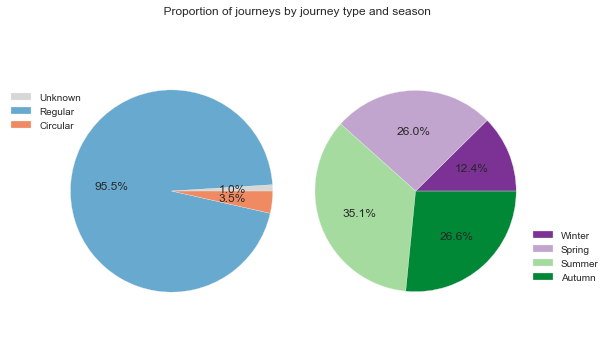

In [19]:
fig = plt.figure()    
ax = fig.add_subplot(121)
plotdata = journeys.groupby("JourneyType").agg({"JourneyType": pd.Series.count})
ax.pie(plotdata.JourneyType.values, autopct='%1.1f%%', labels=('','',''), colors=journey_type_colours)
plt.axis('equal')
plt.legend(labels=('Unknown','Regular','Circular'), bbox_to_anchor=(0.1, 0.85))
ax = fig.add_subplot(122)
plotdata = journeys.groupby("Season").agg({"Season": pd.Series.count})
ax.pie(plotdata.Season.values, autopct='%1.1f%%', labels=('','','',''), colors=season_colours)
plt.axis('equal')
plt.legend(labels=('Winter','Spring','Summer','Autumn'), bbox_to_anchor=(1.45, 0.4))
plt.suptitle("       Proportion of journeys by journey type and season")
plt.show()


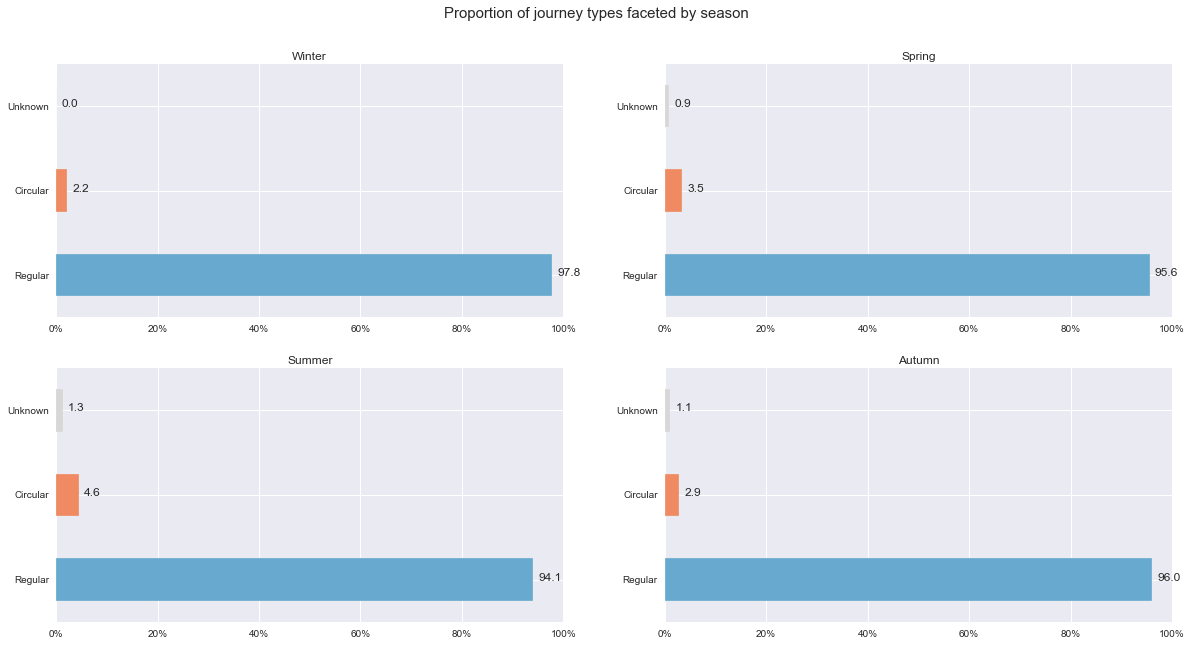

In [20]:
colors = [journey_type_colours[1], journey_type_colours[2], journey_type_colours[0]]
ylabels = ['Regular','Circular', 'Unknown']
xlabels = ["0%","20%","40%","60%","80%","100%"]
fig = plt.figure(figsize=(20,10))    
ax = fig.add_subplot(221)
plotdata = pd.DataFrame(winterJourneys.JourneyType.value_counts())
plotdata["%"] = plotdata.apply(lambda x : x/plotdata.JourneyType.sum())
plotdata.drop("JourneyType", axis=1, inplace=True)
plotdata.plot(ax=ax, kind="barh", color=colors)
plt.title("Winter")
ax.set_yticklabels(ylabels)
ax.set_xticklabels(xlabels)
ax.legend_.remove()
for i in range(len(plotdata)):
    percentage = plotdata.iloc[i].values[0]
    ax.text(1.01-(1-percentage),i,"%.1f" % (percentage*100))
ax = fig.add_subplot(222)
plotdata = pd.DataFrame(springJourneys.JourneyType.value_counts())
plotdata["%"] = plotdata.apply(lambda x : x/plotdata.JourneyType.sum())
plotdata.drop("JourneyType", axis=1, inplace=True)
plotdata.plot(ax=ax, kind="barh", color=colors)
ax.set_yticklabels(ylabels)
ax.set_xticklabels(xlabels)
ax.legend_.remove()
for i in range(len(plotdata)):
    percentage = plotdata.iloc[i].values[0]
    ax.text(1.01-(1-percentage),i, "%.1f" % (percentage*100))
plt.title("Spring")
ax = fig.add_subplot(223)
plotdata = pd.DataFrame(summerJourneys.JourneyType.value_counts())
plotdata["%"] = plotdata.apply(lambda x : x/plotdata.JourneyType.sum())
plotdata.drop("JourneyType", axis=1, inplace=True)
plotdata.plot(ax=ax, kind="barh", color=colors)
ax.set_yticklabels(ylabels)
ax.set_xticklabels(xlabels)
plt.title("Summer")
ax.legend_.remove()
for i in range(len(plotdata)):
    percentage = plotdata.iloc[i].values[0]
    ax.text(1.01-(1-percentage),i,"%.1f" % (percentage*100))
ax = fig.add_subplot(224)
plotdata = pd.DataFrame(autumnJourneys.JourneyType.value_counts())
plotdata["%"] = plotdata.apply(lambda x : x/plotdata.JourneyType.sum())
plotdata.drop("JourneyType", axis=1, inplace=True)
plotdata.plot(ax=ax, kind="barh", color=colors)
ax.set_yticklabels(ylabels)
ax.set_xticklabels(xlabels)
ax.legend_.remove()
for i in range(len(plotdata)):
    percentage = plotdata.iloc[i].values[0]
    ax.text(1.01-(1-percentage),i,"%.1f" % (percentage*100))
plt.title("Autumn")
plt.suptitle("Proportion of journey types faceted by season", fontsize=15)
plt.show()

In [22]:
print("regularJourneys.Distance descriptives:")
print(regularJourneys.Distance.describe())
print("mean distance: %.2f" %(regularJourneys.Distance.mean()))
print("std distance: %.2f" % (regularJourneys.Distance.std()))

print("mean winter distance: %.2f" %(winterJourneys[winterJourneys.JourneyType == 1].Distance.mean()))
print("std winter distance: %.2f" % (winterJourneys[winterJourneys.JourneyType == 1].Distance.std()))
print("mean spring distance: %.2f" %(springJourneys[springJourneys.JourneyType == 1].Distance.mean()))
print("std spring distance: %.2f" % (springJourneys[springJourneys.JourneyType == 1].Distance.std()))
print("mean summer distance: %.2f" %(summerJourneys[summerJourneys.JourneyType == 1].Distance.mean()))
print("std summer distance: %.2f" % (summerJourneys[summerJourneys.JourneyType == 1].Distance.std()))
print("mean autumn distance: %.2f" %(autumnJourneys[autumnJourneys.JourneyType == 1].Distance.mean()))
print("std autumn distance: %.2f" % (autumnJourneys[autumnJourneys.JourneyType == 1].Distance.std()))

regularJourneys.Distance descriptives:
count    9.018396e+06
mean     2.167771e+00
std      1.394114e+00
min      1.375771e-02
25%      1.145813e+00
50%      1.858040e+00
75%      2.866920e+00
max      1.695394e+01
Name: Distance, dtype: float64
mean distance: 2.17
std distance: 1.39
mean winter distance: 2.11
std winter distance: 1.32
mean spring distance: 2.16
std spring distance: 1.38
mean summer distance: 2.19
std summer distance: 1.43
mean autumn distance: 2.17
std autumn distance: 1.39


In [23]:
# How many (non-circular) journeys lasted the minimum distance (0.013757710096100001)??
len(regularJourneys[regularJourneys.Distance == min(regularJourneys.Distance)])

37

In [24]:
regularJourneys[regularJourneys.Distance == min(regularJourneys.Distance)].head()

,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLat,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed
7815660,59431412,6780.0,12268,273.0,1476488880,819,0,10,6,289,...,51.506210,-0.114842,51.506133,-0.114686,0.013758,273.0,1.476540e+09,44520.0,59443902.0,0.007305
4468102,59475492,360.0,7147,273.0,1476654660,819,22,10,7,290,...,51.506210,-0.114842,51.506133,-0.114686,0.013758,273.0,1.476697e+09,42360.0,59486418.0,0.137577
9435413,59493353,5280.0,14449,819.0,1476716580,273,16,10,1,291,...,51.506133,-0.114686,51.506210,-0.114842,0.013758,127.0,1.476727e+09,4860.0,59499501.0,0.009380
7975923,59540155,5040.0,12488,819.0,1476829500,273,23,10,2,292,...,51.506133,-0.114686,51.506210,-0.114842,0.013758,36.0,1.476963e+09,128760.0,59589762.0,0.009827
8419623,59540179,4920.0,13031,819.0,1476829620,273,23,10,2,292,...,51.506133,-0.114686,51.506210,-0.114842,0.013758,36.0,1.476951e+09,116340.0,59580942.0,0.010067


In [25]:
# t-test of regular vs circular, to confirm significant difference?
stats.ttest_ind(regularJourneys.Duration, circularJourneys.Duration, equal_var = False)

Ttest_indResult(statistic=-251.37303137405587, pvalue=0.0)

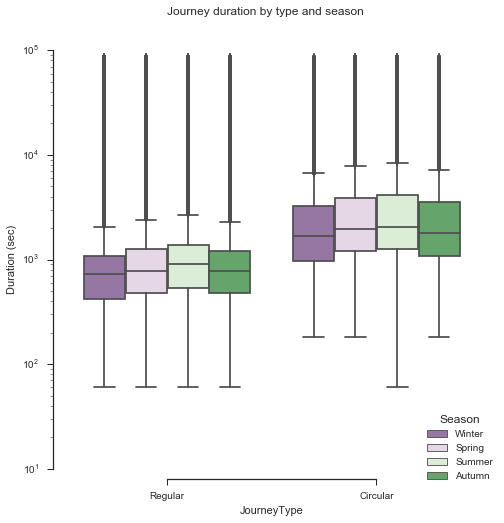

In [26]:
sns.set(style="ticks")
fig = plt.figure(figsize=(7.5,7.5))     
ax = fig.add_subplot(111)
sns.boxplot(ax=ax, x="JourneyType", y="Duration", hue="Season", data=knownJourneys, palette="PRGn")
ax.set_yscale('log')
ax.set_xticklabels(['Regular','Circular'])
sns.despine(offset=10, trim=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, 
    ['Winter','Spring','Summer','Autumn'], 
    title="Season",
    bbox_to_anchor=(1.05, 0.15)
)
plt.suptitle("Journey duration by type and season")
plt.ylabel('Duration (sec)')
plt.show()
sns.set()

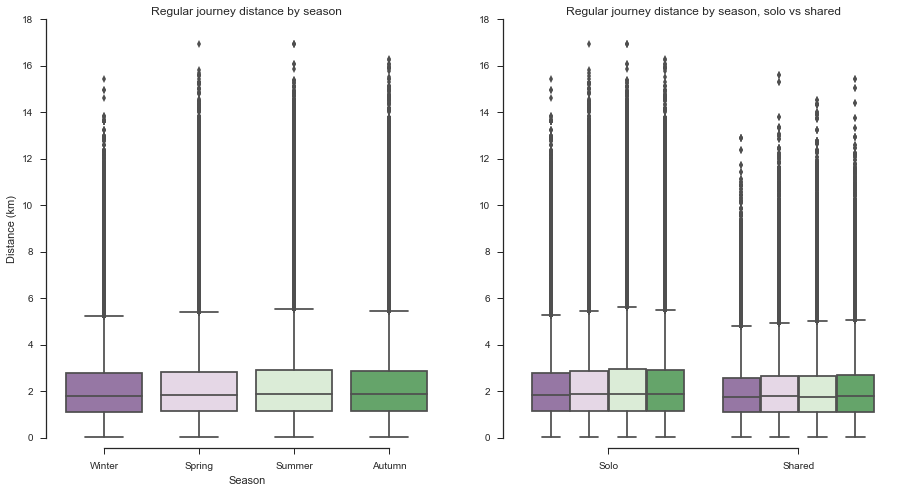

In [27]:
sns.set(style="ticks")
fig = plt.figure(figsize=(15,7.5))     
ax = fig.add_subplot(121)
sns.boxplot(ax=ax, y="Distance", x="Season", data=regularJourneys, palette="PRGn")
sns.despine(offset=10, trim=True)
ax.set_xticklabels(['Winter','Spring','Summer','Autumn'])
plt.title("Regular journey distance by season")
plt.ylabel('Distance (km)')

ax = fig.add_subplot(122)
sns.boxplot(
    ax=ax, 
    x="Shared", 
    y="Distance", 
    hue="Season", 
    data=knownJourneys[knownJourneys.JourneyType == 1], 
    palette="PRGn"
)
ax.set_xticklabels(['Solo','Shared'])
ax.legend_.remove()
sns.despine(offset=10, trim=True)


plt.xlabel("")
plt.ylabel("")
plt.title("Regular journey distance by season, solo vs shared")

plt.show()
sns.set()

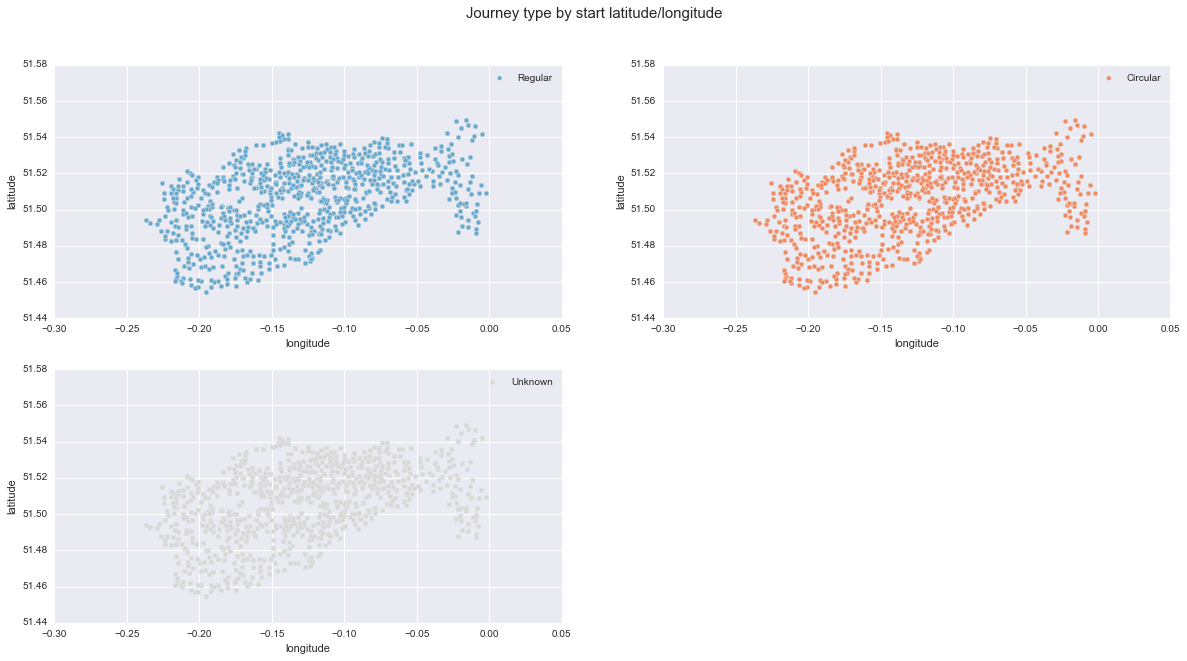

In [29]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(221)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.scatter(
    x=regularJourneys['StartLong'], 
    y=regularJourneys['StartLat'],
    c=journey_type_colours[1]
)
plt.legend(labels=["Regular"])

ax = fig.add_subplot(222)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.scatter(
    x=circularJourneys['StartLong'], 
    y=circularJourneys['StartLat'],
    c=journey_type_colours[2]
)
plt.legend(labels=["Circular"])

ax = fig.add_subplot(223)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.scatter(
    x=unknownJourneys['StartLong'], 
    y=unknownJourneys['StartLat'],
    c=journey_type_colours[0]
)
plt.legend(labels=["Unknown"])

plt.suptitle('Journey type by start latitude/longitude', fontsize=15)
plt.show()

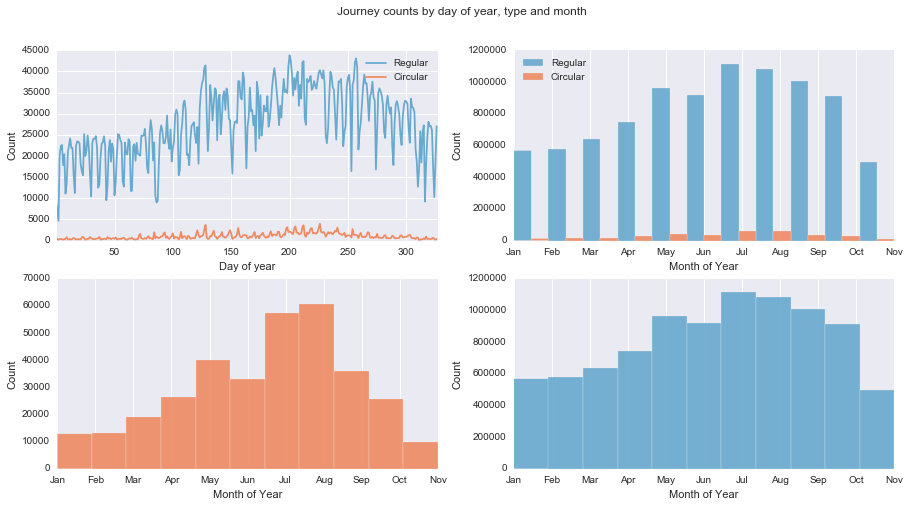

In [30]:
fig = plt.figure(figsize=(15,7.5))     
ax = fig.add_subplot(221)
plotdata1 = regularJourneys[["DayOfYear", "Distance"]].groupby(["DayOfYear"]).count()
plotdata2 = circularJourneys[["DayOfYear", "Distance"]].groupby(["DayOfYear"]).count()
ax.plot(range(327), plotdata1.Distance, label="Regular", color=journey_type_colours[1])
ax.plot(range(327), plotdata2.Distance, label="Circular", color=journey_type_colours[2])
plt.xlim(1,327)
plt.legend()
plt.xlabel('Day of year')
plt.ylabel('Count')

ax = fig.add_subplot(222)
plt.hist([regularJourneys.MonthOfYear, circularJourneys.MonthOfYear], 
        label=['Regular', 'Circular'], bins=11, rwidth=1, color=journey_type_colours[1:3], alpha=0.9)
plt.legend(loc="upper left")
plt.ylabel('Count')
plt.xlabel('Month of Year')
plt.xticks(range(1,12), month_labels)
plt.gca().yaxis.grid(which='both')
plt.xlim(1,11) #0 doesn't exist, and we're missing december

ax = fig.add_subplot(223)
plt.hist(circularJourneys.MonthOfYear, bins=11, rwidth=1, color=journey_type_colours[2], alpha=0.9)
plt.ylabel('Count')
plt.xlabel('Month of Year')
plt.xticks(range(1,12), month_labels)
plt.gca().yaxis.grid(which='both')
plt.xlim(1,11) #0 doesn't exist, and we're missing december

ax = fig.add_subplot(224)
plt.hist(regularJourneys.MonthOfYear, bins=11, rwidth=1, color=journey_type_colours[1], alpha=0.9)
plt.ylabel('Count')
plt.xlabel('Month of Year')
plt.xticks(range(1,12), month_labels)
plt.gca().yaxis.grid(which='both')
plt.xlim(1,11) #0 doesn't exist, and we're missing december

plt.suptitle('Journey counts by day of year, type and month', fontsize=12)
plt.show()

#TODO, can we add rolling average to day of year counts?

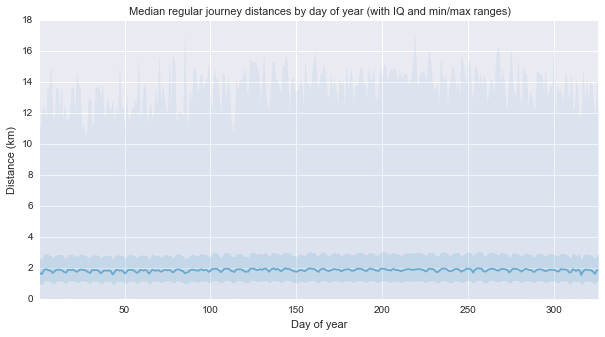

In [31]:
# distance by day of year 
plotdata = regularJourneys[["DayOfYear", "Distance"]].groupby(["DayOfYear"]).describe().unstack()
figure, ax = plt.subplots(1,1, figsize=(10,5))
x = range(327)
meds = plotdata.Distance["50%"]
mins = plotdata.Distance["min"]
maxs = plotdata.Distance["max"]
lows = plotdata.Distance["25%"]
highs = plotdata.Distance["75%"]
ax.plot(x, meds, label="Regular", color=journey_type_colours[1])
ax.fill_between(x, lows, highs, alpha=.2, color=journey_type_colours[1])
ax.fill_between(x, mins, maxs, alpha=.1, color=journey_type_colours[1])
plt.xlim(1, max(x))
plt.ylabel("Distance (km)")
plt.xlabel("Day of year")
plt.title('Median regular journey distances by day of year (with IQ and min/max ranges)',fontsize=11)
plt.show() 

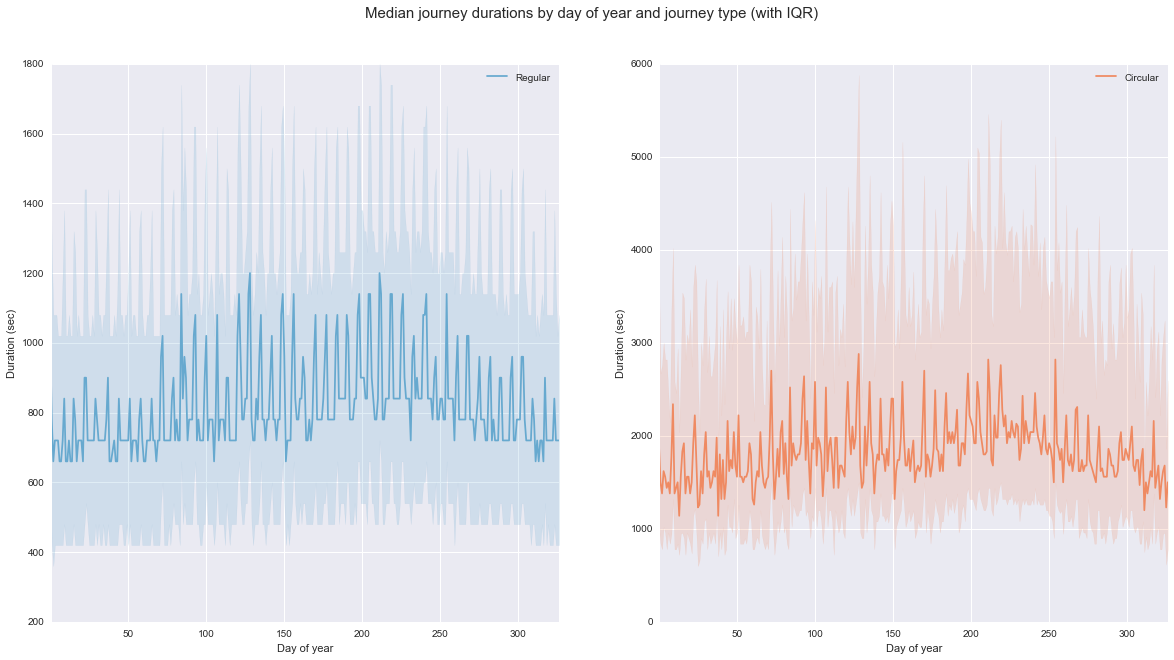

In [34]:
# duration by day of year 
plotdata1 = regularJourneys[["DayOfYear", "Duration"]].groupby(["DayOfYear"]).describe().unstack()
plotdata2 = circularJourneys[["DayOfYear", "Duration"]].groupby(["DayOfYear"]).describe().unstack()
figure, axes = plt.subplots(1,2, figsize=(20,10))
x = range(327)
meds1 = plotdata1.Duration["50%"]
lows1 = plotdata1.Duration["25%"]
highs1 = plotdata1.Duration["75%"]
meds2 = plotdata2.Duration["50%"]
lows2 = plotdata2.Duration["25%"]
highs2 = plotdata2.Duration["75%"]
axes[0].plot(x, meds1, label="Regular", color=journey_type_colours[1])
axes[0].fill_between(x, lows1, highs1, alpha=.2, color=journey_type_colours[1])
axes[0].set_xlim(1, max(x))
axes[0].set_xlabel("Day of year")
axes[0].set_ylabel("Duration (sec)")# duration by day of year 
axes[0].legend()
axes[1].plot(x, meds2, label="Circular", color=journey_type_colours[2])
axes[1].fill_between(x, lows2, highs2, alpha=.2, color=journey_type_colours[2])
axes[1].set_xlim(1, max(x))
axes[1].legend()
axes[1].set_xlabel("Day of year")
axes[1].set_ylabel("Duration (sec)")
plt.suptitle("Median journey durations by day of year and journey type (with IQR)", fontsize=15)
plt.show() 

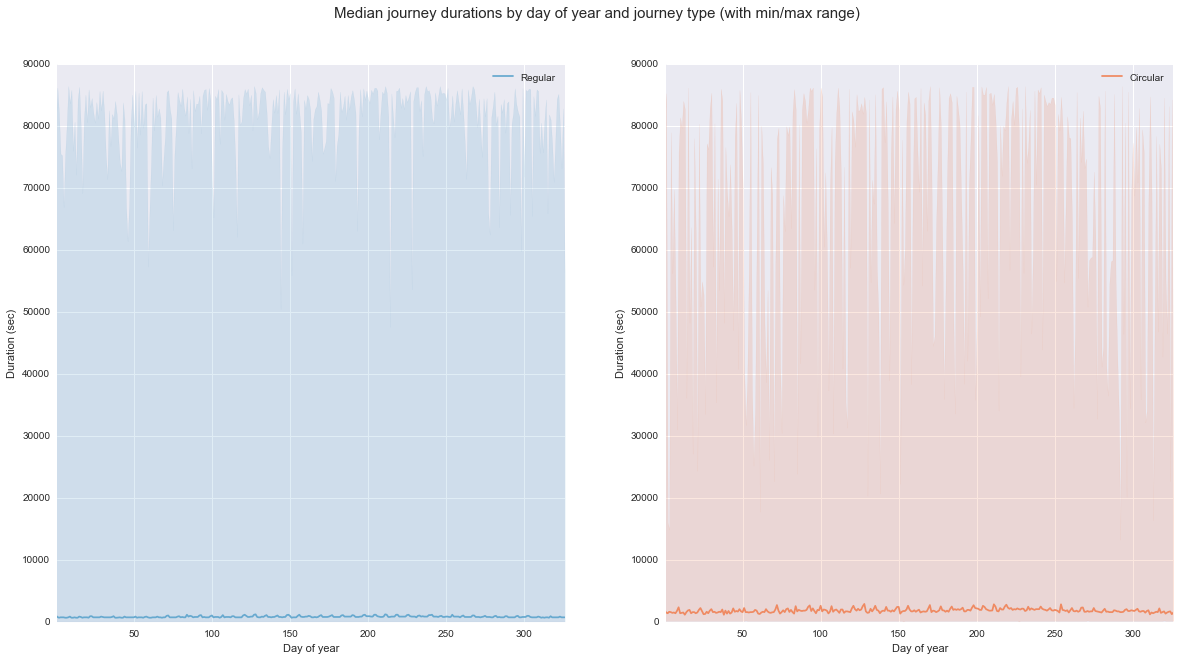

In [35]:
# regular duration by day of year 
fig = plt.figure(figsize=(20,10))     
ax = fig.add_subplot(121)
plotdata = regularJourneys[["DayOfYear", "Duration"]].groupby(["DayOfYear"]).describe().unstack()
x = range(327)
meds = plotdata.Duration["50%"]
lows = plotdata.Duration["25%"]
highs = plotdata.Duration["75%"]
mins = plotdata.Duration["min"]
maxs = plotdata.Duration["max"]
ax.plot(x, meds, label="Regular", color=journey_type_colours[1])
ax.fill_between(x, mins, maxs, alpha=.2, color=journey_type_colours[1])
plt.xlim(1, max(x))
plt.ylabel("Duration (sec)")
plt.xlabel("Day of year")
plt.legend()
#plt.gca().set_yscale('log')
ax = fig.add_subplot(122)
plotdata = circularJourneys[["DayOfYear", "Duration"]].groupby(["DayOfYear"]).describe().unstack()
x = range(327)
meds = plotdata.Duration["50%"]
lows = plotdata.Duration["25%"]
highs = plotdata.Duration["75%"]
mins = plotdata.Duration["min"]
maxs = plotdata.Duration["max"]
ax.plot(x, meds, label="Circular", color=journey_type_colours[2])
ax.fill_between(x, mins, maxs, alpha=.2, color=journey_type_colours[2])
plt.xlim(1, max(x))
plt.ylabel("Duration (sec)")
plt.xlabel("Day of year")
plt.suptitle("Median journey durations by day of year and journey type (with min/max range)", fontsize=15)
plt.legend()
#plt.gca().set_yscale('log')
plt.show() 

In [36]:
foo = regularJourneys[regularJourneys.Distance > 0]
foo = foo[foo.Duration > 0]
stats.linregress(foo.Distance, foo.Duration)

LinregressResult(slope=299.76920639417011, intercept=470.91590441196047, rvalue=0.20829911062794634, pvalue=0.0, stderr=0.46870846202833594)

In [37]:
470.91590441196047 + (299.76920639417011 * max(regularJourneys.Distance))

5553.1852887674777

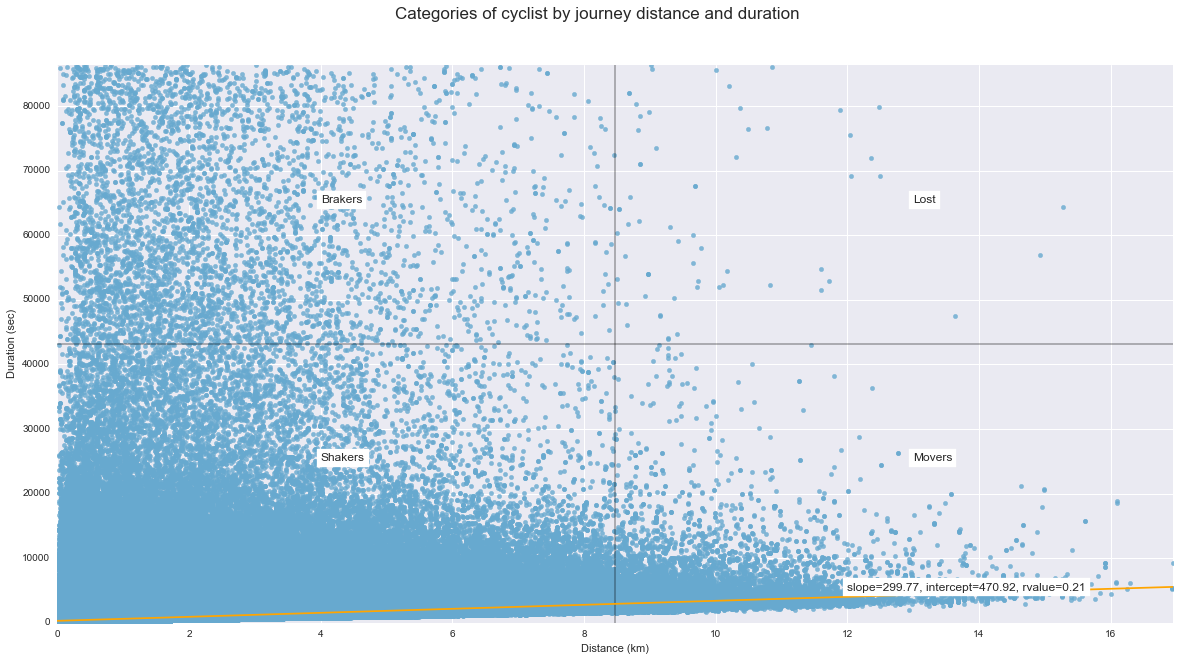

In [38]:
# Categorise into cyclist types (can we split into quadrants, Distance vs Duration?)
sns.set()
x = regularJourneys.Distance
y = regularJourneys.Duration 
plt.figure(figsize=(20,10))   
plt.scatter(x=x, y=y, color=journey_type_colours[1], alpha=0.8)
#sns.regplot(x="Distance", y="Duration", data=regularJourneys, color=journey_type_colours[1])

plt.xlim(0, max(x))
plt.ylim(0, max(y))
plt.xlabel('Distance (km)')
plt.ylabel('Duration (sec)')
plt.axhline(max(regularJourneys.Duration)/2, color='black', alpha=0.3)
plt.axvline(max(regularJourneys.Distance)/2, color='black', alpha=0.3)
t = plt.gca().text(13, 25000,'Movers') 
t.set_bbox(dict(color='white'))
t = plt.gca().text(4, 25000, 'Shakers')
t.set_bbox(dict(color='white'))
t = plt.gca().text(4, 65000,'Brakers') 
t.set_bbox(dict(color='white'))
t = plt.gca().text(13, 65000,'Lost')
t.set_bbox(dict(color='white'))

plt.gca().add_line(Line2D([0, 16.95],[299.77, 5553.19], color="orange"))
t = plt.gca().text(12, 5000,'slope=299.77, intercept=470.92, rvalue=0.21') 
t.set_bbox(dict(color='white'))

plt.suptitle('Categories of cyclist by journey distance and duration', fontsize=17)
plt.show()


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
foo = knownJourneys[["Distance","Duration"]]
foo = foo[foo.Distance > 0]
foo = foo[foo.Duration > 0]
numsamples = 10000
sample = foo.sample(n=numsamples)
clusters = linkage(sample, method='ward', metric='euclidean')

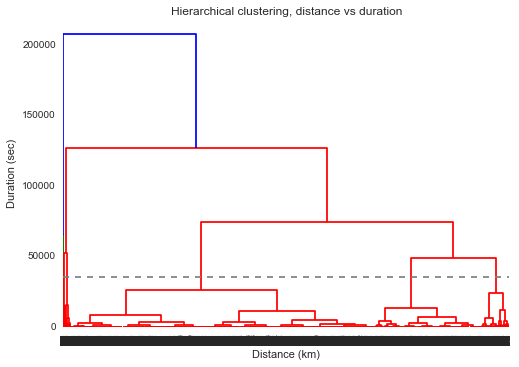

In [14]:
sns.set()
dendrogram(clusters, leaf_rotation=90)
plt.axhline(y=35000, color='grey', linestyle="dashed")
plt.title("Hierarchical clustering, distance vs duration")
plt.xlabel("Distance (km)")
plt.ylabel("Duration (sec)")
plt.show()

In [15]:
numclusters = 5
found_clusters = fcluster(clusters, numclusters, criterion='maxclust')
sample["Cluster"] = found_clusters

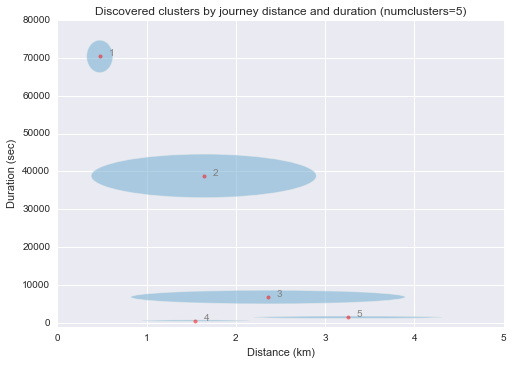

In [17]:
import matplotlib.patches as patches
figure, ax = plt.subplots(1,1)
for i in range(1,numclusters+1):
    cluster = sample[sample.Cluster == i]
    distance = cluster.Distance.describe()
    lowx = distance["25%"]
    medx = distance["50%"]
    highx = distance["75%"]
    duration = cluster.Duration.describe()
    lowy = duration["25%"]
    medy = duration["50%"]
    highy = duration["75%"]
    iqrwidth = (highx-lowx)
    iqrheight = (highy-lowy)
    ax.plot(medx, medy, 'ro', alpha=0.5, markersize=4)
    ax.text(medx+0.1, medy+100, "%s" % (i), color="grey", fontsize=10) 
    ax.add_patch(patches.Ellipse(
        xy=(medx,medy), width=iqrwidth, height=iqrheight, fc=journey_type_colours[1], alpha=0.5, lw=1)
    )

plt.xlim(0, 4.5)
plt.ylim(-1000, 80000)
plt.xlabel('Distance (km)')
plt.ylabel('Duration (sec)')
plt.title('Discovered clusters by journey distance and duration (numclusters=5)', fontsize=12)
plt.show()

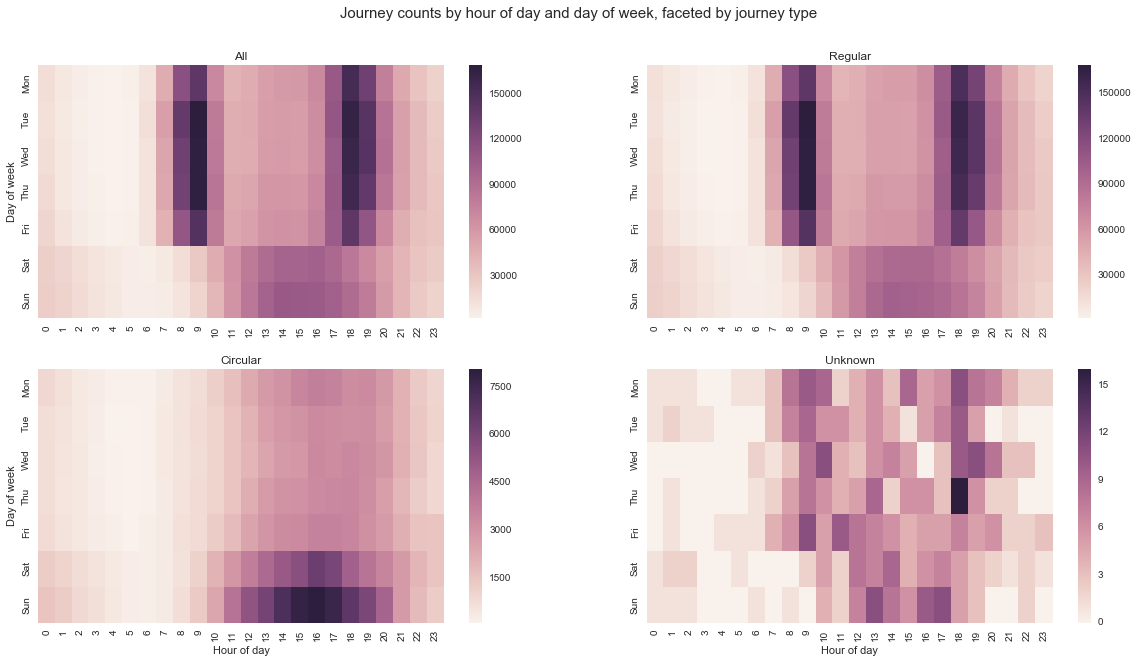

In [46]:
xticklabels = range(0,24)
yticklabels = ["Sun","Sat","Fri","Thu","Wed","Tue","Mon"]
xlabel = "Hour of day"
ylabel = "Day of week"
fig = plt.figure(figsize=(20,10))     
ax = fig.add_subplot(221)
plotdata = knownJourneys[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).count()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel("")
plt.ylabel(ylabel)
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("All")
ax = fig.add_subplot(222)
plotdata = regularJourneys[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).count()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel("")
plt.ylabel("")
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Regular")
ax = fig.add_subplot(223)
plotdata = circularJourneys[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).count()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Circular")
ax = fig.add_subplot(224)
plotdata = unknownJourneys[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).count()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel(xlabel)
plt.ylabel("")
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Unknown")
plt.suptitle("Journey counts by hour of day and day of week, faceted by journey type", fontsize=15)
plt.show()

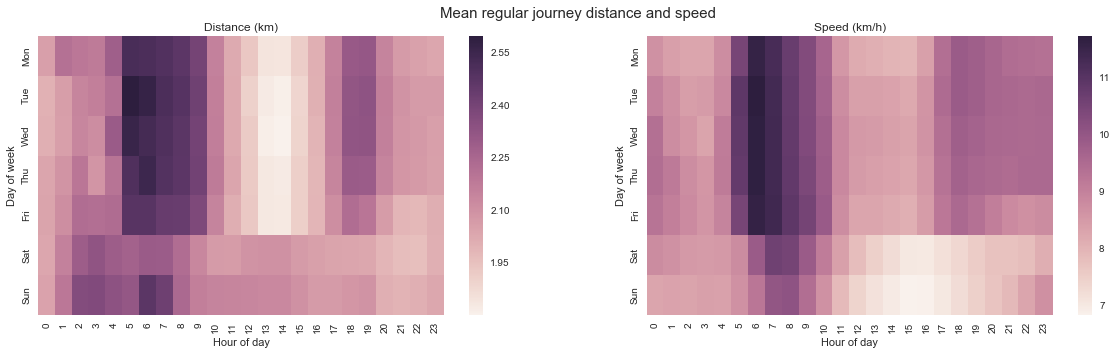

In [47]:
xticklabels = range(0,24)
yticklabels = ["Sun","Sat","Fri","Thu","Wed","Tue","Mon"]
xlabel = "Hour of day"
ylabel = "Day of week"
fig = plt.figure(figsize=(20,5))     
ax = fig.add_subplot(121)
plotdata = regularJourneys[["DayOfWeek", "HourOfDay", "Distance"]].groupby(["DayOfWeek","HourOfDay"]).mean()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Distance (km)")

ax = fig.add_subplot(122)
plotdata = regularJourneys[["DayOfWeek", "HourOfDay", "Speed"]].groupby(["DayOfWeek","HourOfDay"]).mean()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Speed (km/h)")

plt.suptitle("Mean regular journey distance and speed", fontsize=15)
plt.show()

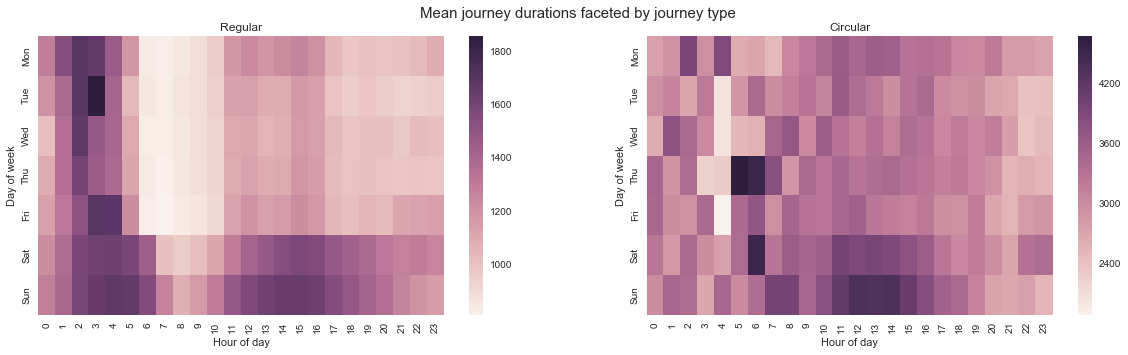

In [48]:
yticklabels = ["Sun","Sat","Fri","Thu","Wed","Tue","Mon"]
xlabel = "Hour of day"
ylabel = "Day of week"
fig = plt.figure(figsize=(20,5))     
ax = fig.add_subplot(121)
plotdata = regularJourneys[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).mean()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Regular")

ax = fig.add_subplot(122)
plotdata = circularJourneys[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).mean()
axes = sns.heatmap(plotdata.unstack(), fmt="d")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
axes.xaxis.set_ticklabels(xticklabels)
axes.yaxis.set_ticklabels(yticklabels)
plt.title("Circular")

plt.suptitle("Mean journey durations faceted by journey type", fontsize=15)
plt.show()

In [49]:
mostJourneysInOneDay = knownJourneys[["BikeId", "DayOfYear", "Distance"]].groupby(["DayOfYear", "BikeId"]).count()

In [50]:
mostJourneysInOneDay.sort_values(by="Distance", ascending=False).head()

Distance
DayOfYear BikeId          
212       7200          23
          12622         22
302       13379         21
168       13360         21
202       2545          21

In [51]:
mostJourneysInOneDay = journeys[(journeys.BikeId == 7200) & (journeys.DayOfYear == 212)].sort_values(by="StartDateTime")

In [52]:
plotdata = pd.DataFrame.merge(
    mostJourneysInOneDay, stations[["id","name"]], left_on="StartStationId", right_on="id")
plotdata = pd.DataFrame.merge(
    plotdata, stations[["id","name"]], left_on="EndStationId", right_on="id")
plotdata.rename(columns={'name_x':'StartStationName'}, inplace=True)
plotdata.rename(columns={'name_y':'EndStationName'}, inplace=True)
plotdata = plotdata.sort_values(by="StartDateTime")
plotdata.set_index([[i for i in range(0,plotdata.shape[0])]], inplace=True)

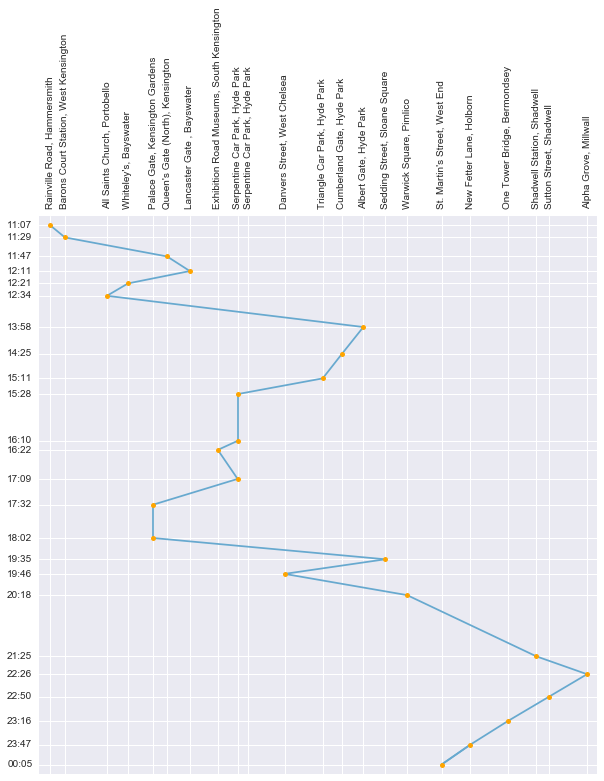

In [53]:
longsorted = plotdata[plotdata.Distance > 0].sort_values(by="EndLong")
longsorted.set_index([[i for i in range(longsorted.shape[0])]], inplace=True)
longsorted.head()
plotstations = [plotdata.StartStationName.values[0]]
for name in longsorted.EndStationName.values:
    plotstations.append(name)
plotintervals = [longsorted.StartLong[0]]    
for index, row in longsorted.iterrows():
    ix = row.name
    nextix = ix+1
    if ix == 0:
        a1 = row['StartLat'] * rad
        a2 = row['StartLong'] * rad
        b1 = row['EndLat'] * rad
        b2 = row['EndLong'] * rad
        dlon = b2 - a2
        dlat = b1 - a1
        a = math.pow(math.sin(dlat/2),2) + math.cos(a1) * math.cos(b1) * math.pow(math.sin(dlon/2),2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        d = R * c
        plotintervals.append(plotintervals[-1] + d + 0.5)# bumping by 0.5 to space ticks out a bit..
    if nextix < longsorted.shape[0]:
        nextrow = longsorted.iloc[nextix]
        a1 = row['EndLat'] * rad
        a2 = row['EndLong'] * rad
        b1 = nextrow['EndLat'] * rad
        b2 = nextrow['EndLong'] * rad
        dlon = b2 - a2
        dlat = b1 - a1
        a = math.pow(math.sin(dlat/2),2) + math.cos(a1) * math.cos(b1) * math.pow(math.sin(dlon/2),2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        d = R * c
        plotintervals.append(plotintervals[-1] + d + 1)# bumping by 1 to space ticks out a bit..

#print(len(plotstations))
#print(len(plotintervals))
#print(plotstations)
#print(plotintervals)

figure, ax = plt.subplots(1,1, figsize=(10,10))
#ax.grid(b=False)
ax.xaxis.tick_top()
plt.xticks(plotintervals, plotstations, rotation="vertical")
plt.xlim(min(plotintervals)-1, max(plotintervals)+1)

runningduration=sum(plotdata.Duration)
plotdurations = []
plotdurationlabels = []
for index, row in plotdata.iterrows():
    ix = row.name
    duration = row.Duration
    startstation = row.StartStationName
    startx = plotintervals[plotstations.index(startstation)]
    starty = runningduration
    endy = runningduration - duration -250 # need to spread labels out a bit
    plotdurations.append(starty)
    startdatetime = datetime.fromtimestamp(row.StartDateTime)
    plotdurationlabels.append(datetime.strftime(startdatetime, "%H:%M"))
    nextix = ix+1
    
    if nextix < plotdata.shape[0]:
        nextrow = plotdata.iloc[nextix]
        endstation = nextrow.StartStationName
        endx = plotintervals[plotstations.index(endstation)]
        ax.add_line(Line2D([startx, endx],[starty, endy],color=journey_type_colours[1]))
        ax.plot(startx, starty, marker="o", color="orange", markersize=5)   
    else:
        endstation = row.EndStationName
        endx = plotintervals[plotstations.index(endstation)]
        endy = runningduration - duration
        plotdurations.append(endy)
        enddatetime = datetime.fromtimestamp(row.StartDateTime + duration)
        plotdurationlabels.append(datetime.strftime(enddatetime, "%H:%M"))
        ax.add_line(Line2D([startx, endx],[starty, endy],color=journey_type_colours[1]))
        ax.add_line(Line2D([startx, endx],[starty, endy],color=journey_type_colours[1]))
        ax.plot(startx, starty, marker="o", color="orange", markersize=5)   
        ax.plot(endx, endy, marker="o", color="orange", markersize=5)
    runningduration = endy

plt.yticks(plotdurations, plotdurationlabels)
plt.ylim(-6000, sum(plotdata.Duration)+500)
plt.show()

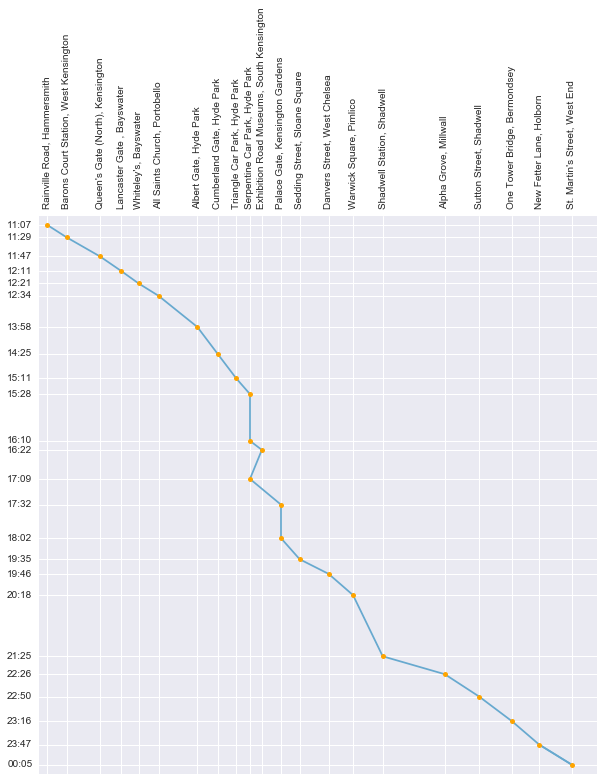

In [54]:
plotstations = [plotdata.StartStationName.values[0]]
for name in plotdata.EndStationName.unique():
    plotstations.append(name)
plotdistances = [0]    
for distance in plotdata.Distance.unique():
    plotdistances.append(plotdistances[-1]+distance+1.5)

figure, ax = plt.subplots(1,1, figsize=(10,10))
ax.xaxis.tick_top()
plt.xticks(plotdistances, plotstations, rotation="vertical")
plt.xlim(min(plotdistances)-1, max(plotdistances))

runningduration=sum(plotdata.Duration)
plotdurations = []
plotdurationlabels = []
for index, row in plotdata.iterrows():
    ix = row.name
    duration = row.Duration
    startstation = row.StartStationName
    startx = plotdistances[plotstations.index(startstation)]
    starty = runningduration
    endy = runningduration - duration -250
    plotdurations.append(starty)
    startdatetime = datetime.fromtimestamp(row.StartDateTime)
    plotdurationlabels.append(datetime.strftime(startdatetime, "%H:%M"))
    nextix = ix+1
    
    if nextix < plotdata.shape[0]:
        nextrow = plotdata.iloc[nextix]
        endstation = nextrow.StartStationName
        endx = plotdistances[plotstations.index(endstation)]
        ax.add_line(Line2D([startx, endx],[starty, endy],color=journey_type_colours[1]))
        ax.plot(startx, starty, marker="o", color="orange", markersize=5)   
    else:
        endstation = row.EndStationName
        endx = plotdistances[plotstations.index(endstation)]
        endy = runningduration - duration
        plotdurations.append(endy)
        enddatetime = datetime.fromtimestamp(row.StartDateTime + duration)
        plotdurationlabels.append(datetime.strftime(enddatetime, "%H:%M"))
        ax.add_line(Line2D([startx, endx],[starty, endy],color=journey_type_colours[1]))
        ax.add_line(Line2D([startx, endx],[starty, endy],color=journey_type_colours[1]))
        ax.plot(startx, starty, marker="o", color="orange", markersize=5)   
        ax.plot(endx, endy, marker="o", color="orange", markersize=5)
    runningduration = endy

plt.yticks(plotdurations, plotdurationlabels)
plt.ylim(-6000, sum(plotdata.Duration)+500)
plt.show()

In [55]:
mostJourneys = knownJourneys.groupby("BikeId").agg({"RentalId": pd.Series.count})
mostJourneys.rename(columns={'RentalId':'JourneyCount'}, inplace=True)

In [56]:
mostJourneys.sort_values(by="JourneyCount", ascending=False).head()

,JourneyCount
BikeId,
13188,1243
12879,1236
12768,1236
13095,1231
13194,1223


In [57]:
mostJourneys = knownJourneys[knownJourneys.BikeId == 13188].sort_values(by="StartDateTime")
# How far did it go, though? And how fast?
print("Made most journeys, average speed: %.2f" % (mostJourneys.Speed.mean()))
print("Made most journeys, max speed: %.2f" % (mostJourneys.Speed.max()))
print("Made most journeys, total distance: %.2f" % (mostJourneys.Distance.sum()))
print("Made most journeys, total duration: %.2f" % (mostJourneys.Duration.sum()/60/60/24))
print("Made most journeys, num journeys: %d" % (mostJourneys.shape[0]))
2560.95/1243

Made most journeys, average speed: 9.14
Made most journeys, max speed: 20.55
Made most journeys, total distance: 2560.95
Made most journeys, total duration: 16.35
Made most journeys, num journeys: 1243


2.0602976669348347

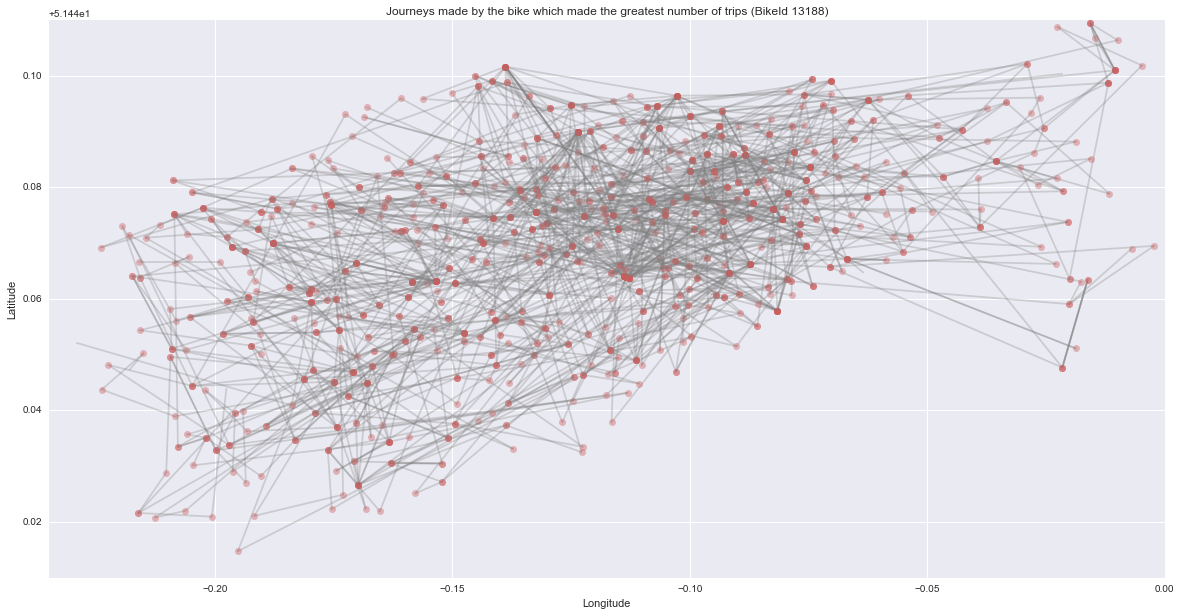

In [837]:
figure, ax = plt.subplots(1,1, figsize=(20,10))
plt.xlim(-0.235, 0)
plt.ylim(51.45, 51.55)
stage=1
for index, row in mostJourneys.iterrows():
        ax.add_line(Line2D([row.StartLong,row.EndLong],[row.StartLat, row.EndLat], alpha=0.3, color="grey"))
        ax.plot(row.StartLong, row.StartLat, 'o', color="indianred", alpha=0.4)
        stage = stage + 1
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Journeys made by the bike which made the greatest number of trips (BikeId 13188)")        
plt.show()

In [58]:
# most distance
furthestJourneys = knownJourneys.groupby("BikeId").agg({"Distance": pd.Series.sum})
furthestJourneys.sort_values(by="Distance", ascending=False).head()

,Distance
BikeId,
12725,2675.828956
12757,2658.376116
13095,2644.431476
12768,2622.395226
13431,2614.598994


In [59]:
# How fast did it go?
furthestJourneys = knownJourneys[knownJourneys.BikeId == 12725].sort_values(by="StartDateTime")
print("Made furthest journeys, average speed: %.2f" % (furthestJourneys.Speed.mean()))
print("Made furthest journeys, max speed: %.2f" % (furthestJourneys.Speed.max()))
print("Made furthest journeys, journey count: %d" % (len(furthestJourneys.RentalId)))

Made furthest journeys, average speed: 8.99
Made furthest journeys, max speed: 19.61
Made furthest journeys, journey count: 1206


In [60]:
shortestJourneys = knownJourneys.groupby("BikeId").agg({"Distance": pd.Series.sum})
shortestJourneys.sort_values(by="Distance")[0:10]

,Distance
BikeId,
9495,0.000000
3,2.794790
5594,3.768734
14078,5.018514
14133,5.369648
1212,6.343611
12452,10.885576
6835,11.867815
12008,13.161747


In [61]:
knownJourneys[knownJourneys.BikeId == 9495] #all of these were from/to "Contact Centre, Southbury House"

,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed,Shared
6010430,52836219,240.0,9495,241.0,1460455560,241,11,4,2,103,...,NaN,NaN,NaN,NaN,241.0,1.462284e+09,1827960.0,53418836.0,NaN,False
6010431,53418836,240.0,9495,241.0,1462283760,241,14,5,2,124,...,NaN,NaN,NaN,NaN,241.0,1.464188e+09,1903800.0,54210668.0,NaN,False
6010432,54210668,1260.0,9495,241.0,1464187800,241,15,5,3,146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [62]:
shortestJourneys = knownJourneys[knownJourneys.BikeId == 3].sort_values(by="StartDateTime")
print("Made shortest journeys, average speed: %.2f" % (shortestJourneys.Speed.mean()))
print("Made shortest journeys, max speed: %.2f" % (shortestJourneys.Speed.max()))
print("Made shortest journeys, journey count: %d" % (len(shortestJourneys.RentalId)))

Made shortest journeys, average speed: 9.33
Made shortest journeys, max speed: 14.01
Made shortest journeys, journey count: 2


In [63]:
shortestJourneys.head()

,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed,Shared
2032,50610732,420.0,3,516.0,1451624700,763,5,1,5,1,...,-0.032567,51.511200,-0.014438,1.634447,516.0,1.451705e+09,79800.0,50618927.0,14.009545,False
2033,50618927,900.0,3,460.0,1451704920,516,3,1,6,2,...,-0.014438,51.516196,-0.029138,1.160343,NaN,NaN,NaN,NaN,4.641371,False


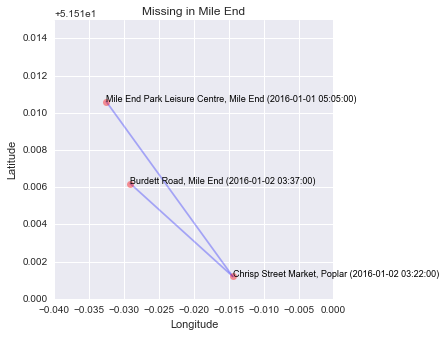

In [64]:
shortestJourneys = pd.DataFrame.merge(
    knownJourneys[knownJourneys.BikeId.isin([3])], 
        stations[["id","name"]], left_on="StartStationId", right_on="id")
shortestJourneys = pd.DataFrame.merge(
    shortestJourneys, stations[["id","name"]], left_on="EndStationId", right_on="id")

figure, ax = plt.subplots(1,1, figsize=(5,5))
plt.xlim(-0.04, 0)
plt.ylim(51.510, 51.525)
for index, row in shortestJourneys.iterrows():
    ax.add_line(Line2D([row.StartLong,row.EndLong],[row.StartLat, row.EndLat], alpha=0.3))
    ax.plot(row.StartLong, row.StartLat, 'ro', alpha=0.4)
    t = ax.text(row.StartLong, row.StartLat, "%s (%s)" % (row["name_x"], 
        datetime.fromtimestamp(row.StartDateTime)), fontsize=9, color="black")
    if (index == 1):
        t = ax.text(row.EndLong, row.EndLat, "%s (%s)" % (row["name_y"], 
            datetime.fromtimestamp(row.StartDateTime + row.Duration)), fontsize=9, color="black")
        ax.plot(row.EndLong, row.EndLat, 'ro', alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Missing in Mile End")
plt.show()

In [65]:
# What's the furthest someone has gone on a bike?
furthestJourney = journeys[journeys.Distance == max(journeys.Distance)]
print("start: \t%s" %(stations[stations.id == 694].name.values[0]))
print("end: \t%s" %(stations[stations.id == 787].name.values[0]))
print("duration: %.1f hours" %(furthestJourney.Duration/60/60))
print("%s" %(datetime.fromtimestamp(furthestJourney.StartDateTime)))
furthestJourney

start: 	Putney Rail Station, Putney
end: 	Timber Lodge, Queen Elizabeth Olympic Park
duration: 2.6 hours
2016-03-26 02:01:00


,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLat,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed
8833752,52428649,9240.0,13499,787.0,1458957660,694,2,3,6,86,...,51.460717,-0.216526,51.546805,-0.014691,16.953941,787.0,1.458992e+09,25140.0,52431917.0,6.605431


In [66]:
# What's the shortest someone has gone on a bike?
shortestJourneys = regularJourneys[regularJourneys.Distance == min(regularJourneys.Distance)]
print("start: \t%s" %(stations[stations.id == 273].name.values[0]))
print("end: \t%s" %(stations[stations.id == 819].name.values[0]))
shortestJourneys.sort_values(by="DayOfYear").head()

start: 	Belvedere Road, South Bank
end: 	Belvedere Road 2, South Bank


,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLat,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed
7815660,59431412,6780.0,12268,273.0,1476488880,819,0,10,6,289,...,51.506210,-0.114842,51.506133,-0.114686,0.013758,273.0,1.476540e+09,44520.0,59443902.0,0.007305
4468102,59475492,360.0,7147,273.0,1476654660,819,22,10,7,290,...,51.506210,-0.114842,51.506133,-0.114686,0.013758,273.0,1.476697e+09,42360.0,59486418.0,0.137577
9435413,59493353,5280.0,14449,819.0,1476716580,273,16,10,1,291,...,51.506133,-0.114686,51.506210,-0.114842,0.013758,127.0,1.476727e+09,4860.0,59499501.0,0.009380
7975923,59540155,5040.0,12488,819.0,1476829500,273,23,10,2,292,...,51.506133,-0.114686,51.506210,-0.114842,0.013758,36.0,1.476963e+09,128760.0,59589762.0,0.009827
8419623,59540179,4920.0,13031,819.0,1476829620,273,23,10,2,292,...,51.506133,-0.114686,51.506210,-0.114842,0.013758,36.0,1.476951e+09,116340.0,59580942.0,0.010067


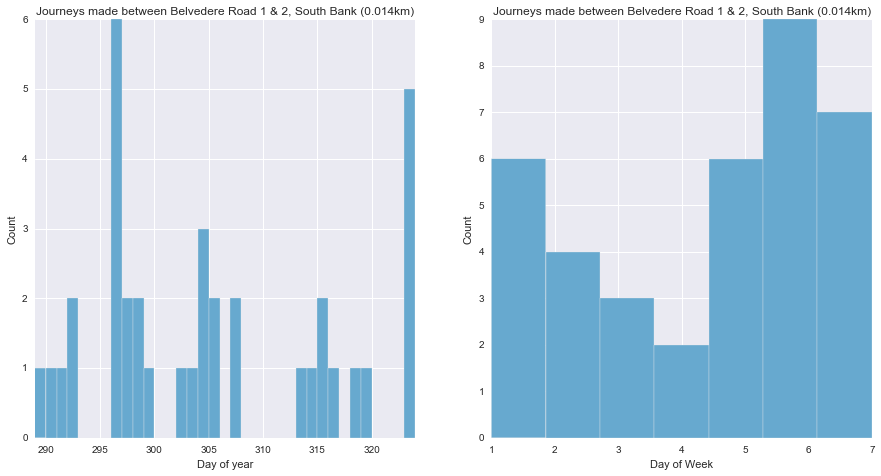

In [67]:
fig = plt.figure(figsize=(15,7.5))     
ax = fig.add_subplot(121)
ax.hist(shortestJourneys.DayOfYear, label="Regular", color=journey_type_colours[1], bins=324-289)
plt.xlim(289,324)
plt.xlabel('Day of year')
plt.ylabel('Count')
plt.title('Journeys made between Belvedere Road 1 & 2, South Bank (0.014km)')
ax = fig.add_subplot(122)
ax.hist(shortestJourneys.DayOfWeek, label="Regular", color=journey_type_colours[1], bins=7)
plt.xlim(1,7)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Journeys made between Belvedere Road 1 & 2, South Bank (0.014km)')
plt.show()

In [68]:
# Which station has had the most bikes passing through it?
foo = journeys.groupby("StartStationId").agg({"BikeId": pd.Series.nunique})
foo.sort_values(by="BikeId", ascending=False).head()

,BikeId
StartStationId,
14,12502
154,12424
374,12275
191,12068
217,11959


In [69]:
print("start: %s" %(stations[stations.id == 14].name.values[0]))
print("start: %s" %(stations[stations.id == 154].name.values[0]))

start: Belgrove Street , King's Cross
start: Waterloo Station 3, Waterloo


In [70]:
foo = journeys.groupby("EndStationId").agg({"BikeId": pd.Series.nunique})
foo.sort_values(by="BikeId", ascending=False).head()

,BikeId
EndStationId,
14.0,12507
154.0,12413
194.0,12254
374.0,12123
217.0,12081


In [71]:
len(journeys.BikeId.unique()) - 12507 # only 12708 minus 12507 bikes *haven't* been to Belgrove Street!?
# Bikes love this place, there's really nowhere they'd rather be

201

In [72]:
foo.sort_values(by="BikeId", ascending=True).head()

,BikeId
EndStationId,
241.0,1
434.0,17
778.0,41
346.0,44
494.0,683


In [73]:
print("start: %s" %(stations[stations.id == 778].name))
journeys[journeys.StartStationId == 778].head()
#datetime.fromtimestamp(1460909820)
# 241 and 567 are TFL maintenance e.g. "Contact Centre, Southbury House"
# 778 is/was ("Pop Up Dock 1")

start: Series([], Name: name, dtype: object)


,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLat,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed
6976141,52945619,960.0,10920,436.0,1460808360,778,13,4,6,107,...,NaN,NaN,51.518240,-0.116550,NaN,12.0,1.460896e+09,86520.0,52966493.0,NaN
2324367,52945626,960.0,3737,436.0,1460808360,778,13,4,6,107,...,NaN,NaN,51.518240,-0.116550,NaN,436.0,1.460813e+09,3900.0,52947316.0,NaN
8771262,52945668,840.0,13430,436.0,1460808480,778,13,4,6,107,...,NaN,NaN,51.518240,-0.116550,NaN,436.0,1.460811e+09,1500.0,52946402.0,NaN
8872747,52946847,780.0,13541,89.0,1460812020,778,14,4,6,107,...,NaN,NaN,51.526250,-0.123510,NaN,89.0,1.460821e+09,7980.0,52949989.0,NaN
2524316,52948273,1260.0,4071,93.0,1460816400,778,15,4,6,107,...,NaN,NaN,51.534409,-0.109025,NaN,93.0,1.460819e+09,1140.0,52949189.0,NaN


In [74]:
sharedJourneys.shape

(1043368, 23)

In [78]:
sharedJourneyCounts = pd.DataFrame(
    sharedJourneys.groupby(
        ["StartStationId", "EndStationId","StartDateTime"]).agg(
            {"RentalId":pd.Series.count}).to_records())
sharedJourneyCounts[sharedJourneyCounts.RentalId > 9] #eh!? mass bike ride!?

,StartStationId,EndStationId,StartDateTime,RentalId
154982,229,104.0,1462453680,12


In [119]:
print("start: %s" %(stations[stations.id == 229].name.values[0]))
print("end: %s" %(stations[stations.id == 104].name.values[0]))
print("date: %s" %(datetime.utcfromtimestamp(1462453680)))

start: Whitehall Place, Strand
end: Crosswall, Tower
date: 2016-05-05 13:08:00


In [120]:
journeys[(journeys.StartStationId == 229) & (journeys.EndStationId == 104) & (journeys.StartDateTime == 1462453680)]

,RentalId,Duration,BikeId,EndStationId,StartDateTime,StartStationId,HourOfDay,MonthOfYear,DayOfWeek,DayOfYear,...,StartLat,StartLong,EndLat,EndLong,Distance,NextStartStationId,NextStartDateTime,GapToNextJourney,NextRentalId,Speed
4846645,53491741,1920.0,7723,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,104.0,1.462471e+09,14940.0,53503863.0,6.075548
211721,53491743,1920.0,326,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,104.0,1.462460e+09,4860.0,53495294.0,6.075548
9147634,53491744,1920.0,13888,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,104.0,1.462461e+09,5100.0,53495410.0,6.075548
3510624,53491745,1860.0,5680,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,104.0,1.462475e+09,19920.0,53509789.0,6.271533
4969708,53491746,1920.0,7899,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,217.0,1.462493e+09,37080.0,53516013.0,6.075548
494807,53491748,1860.0,768,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,104.0,1.462472e+09,16620.0,53506078.0,6.271533
2799052,53491750,1920.0,4509,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,579.0,1.462496e+09,40140.0,53516289.0,6.075548
5279735,53491753,1920.0,8354,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,104.0,1.462457e+09,1860.0,53493733.0,6.075548
5787806,53491755,1920.0,9141,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,9.0,1.462469e+09,13440.0,53501729.0,6.075548
6563090,53491756,1860.0,10322,104.0,1462453680,229,14,5,4,126,...,51.506543,-0.12318,51.511595,-0.077121,3.240292,9.0,1.462468e+09,12780.0,53500914.0,6.271533


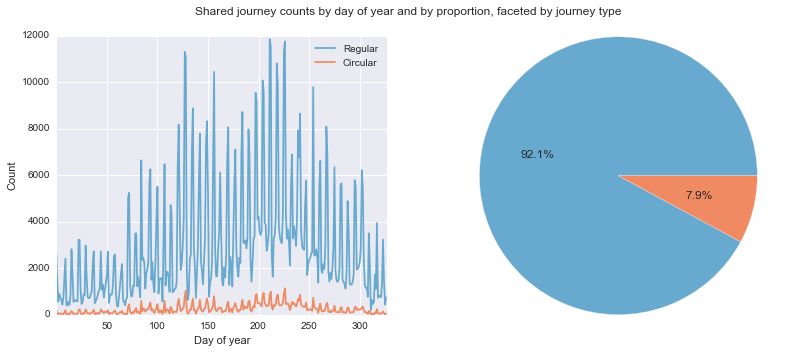

In [81]:
sns.set()
fig = plt.figure(figsize=(13,5))    
ax = fig.add_subplot(121)

plotdata1 = sharedJourneys[sharedJourneys.JourneyType == 1].groupby(
    ["DayOfYear"]).agg({"RentalId": pd.Series.count})
plotdata2 = sharedJourneys[sharedJourneys.JourneyType == 2].groupby(
    ["DayOfYear"]).agg({"RentalId": pd.Series.count})
ax.plot(range(327), plotdata1.RentalId, label="Regular", color=journey_type_colours[1])
ax.plot(range(327), plotdata2.RentalId, label="Circular", color=journey_type_colours[2])
plt.xlim(1,327)
plt.legend()
plt.xlabel('Day of year')
plt.ylabel('Count')

ax = fig.add_subplot(122)
plotdata = sharedJourneys.groupby("JourneyType").agg({"JourneyType": pd.Series.count})
ax.pie(plotdata.JourneyType.values, autopct='%1.1f%%', labels=('',''), colors=journey_type_colours[1:3])
plt.axis('equal')
#plt.legend(labels=('Regular','Circular'), bbox_to_anchor=(0.1, 0.85))

plt.suptitle("Shared journey counts by day of year and by proportion, faceted by journey type")
plt.show()

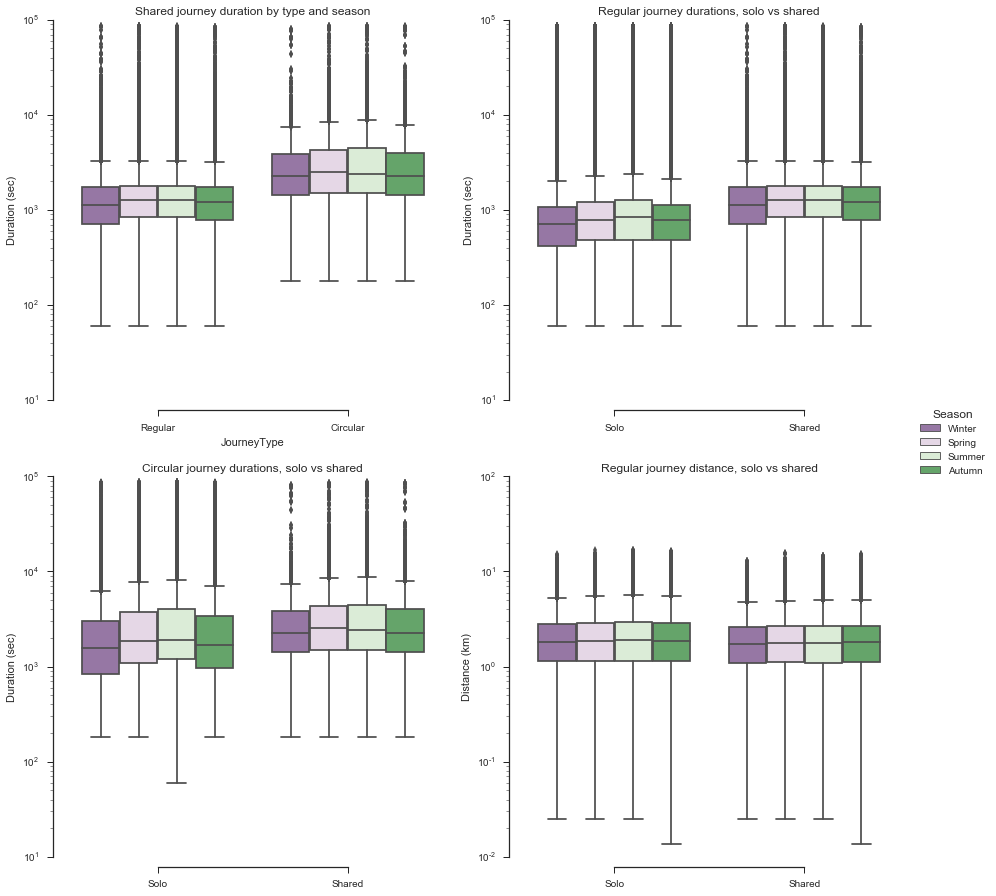

In [82]:
sns.set(style="ticks")
fig = plt.figure(figsize=(15,15))     

ax = fig.add_subplot(221)
sns.boxplot(ax=ax, x="JourneyType", y="Duration", hue="Season", data=sharedJourneys, palette="PRGn")
ax.set_yscale('log')
ax.set_xticklabels(['Regular','Circular'])
sns.despine(offset=10, trim=True)
ax.legend_.remove()
plt.title("Shared journey duration by type and season")
plt.ylabel('Duration (sec)')

ax = fig.add_subplot(222)
sns.boxplot(
    ax=ax, 
    x="Shared", 
    y="Duration", 
    hue="Season", 
    data=knownJourneys[knownJourneys.JourneyType == 1], 
    palette="PRGn"
)
ax.set_yscale('log')
ax.set_xticklabels(['Solo','Shared'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, 
    ['Winter','Spring','Summer','Autumn'], 
    title="Season",
    bbox_to_anchor=(1.25, 0)
)

sns.despine(offset=10, trim=True)
plt.xlabel("")
plt.ylabel("Duration (sec)")
plt.title("Regular journey durations, solo vs shared")

ax = fig.add_subplot(223)
sns.boxplot(
    ax=ax, 
    x="Shared", 
    y="Duration", 
    hue="Season", 
    data=knownJourneys[knownJourneys.JourneyType == 2], 
    palette="PRGn"
)
ax.set_yscale('log')
ax.set_xticklabels(['Solo','Shared'])
sns.despine(offset=10, trim=True)
ax.legend_.remove()
plt.xlabel("")
plt.ylabel('Duration (sec)')
plt.title("Circular journey durations, solo vs shared")

ax = fig.add_subplot(224)
sns.boxplot(
    ax=ax, 
    x="Shared", 
    y="Distance", 
    hue="Season", 
    data=knownJourneys[knownJourneys.JourneyType == 1], 
    palette="PRGn"
)
ax.set_yscale('log')
ax.set_xticklabels(['Solo','Shared'])
ax.legend_.remove()
sns.despine(offset=10, trim=True)


plt.xlabel("")
plt.ylabel("Distance (km)")
plt.title("Regular journey distance, solo vs shared")

plt.show()

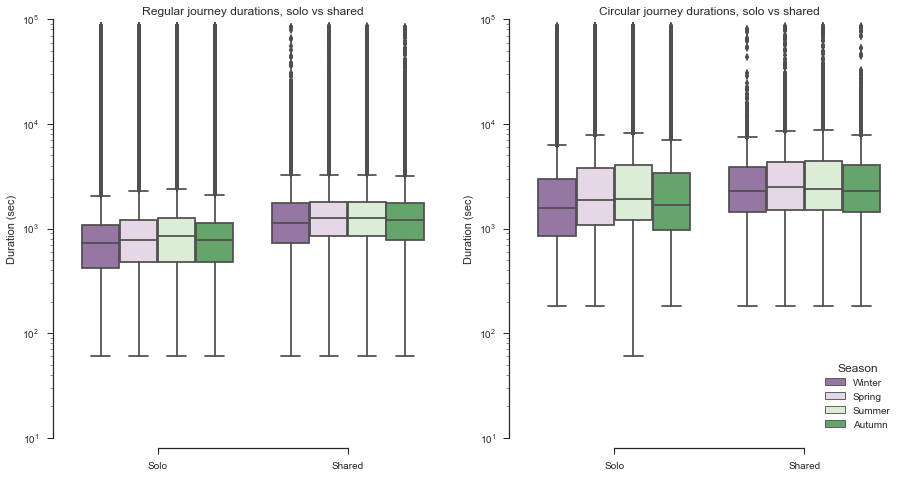

In [83]:
sns.set(style="ticks")
fig = plt.figure(figsize=(15,7.5))     

ax = fig.add_subplot(121)
sns.boxplot(
    ax=ax, 
    x="Shared", 
    y="Duration", 
    hue="Season", 
    data=knownJourneys[knownJourneys.JourneyType == 1], 
    palette="PRGn"
)
ax.set_yscale('log')
ax.set_xticklabels(['Solo','Shared'])
ax.legend_.remove()

sns.despine(offset=10, trim=True)
plt.xlabel("")
plt.ylabel("Duration (sec)")
plt.title("Regular journey durations, solo vs shared")

ax = fig.add_subplot(122)
sns.boxplot(
    ax=ax, 
    x="Shared", 
    y="Duration", 
    hue="Season", 
    data=knownJourneys[knownJourneys.JourneyType == 2], 
    palette="PRGn"
)
ax.set_yscale('log')
ax.set_xticklabels(['Solo','Shared'])
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, 
    ['Winter','Spring','Summer','Autumn'], 
    title="Season",
    bbox_to_anchor=(1, 0.2)
)

sns.despine(offset=10, trim=True)

plt.xlabel("")
plt.ylabel('Duration (sec)')
plt.title("Circular journey durations, solo vs shared")

plt.show()

In [84]:
journeyCounts = regularJourneys.groupby(["StartStationId", "EndStationId"]).agg({"RentalId":pd.Series.count})
journeyCounts = pd.DataFrame(journeyCounts.to_records())
journeyCounts.rename(columns={'RentalId':'JourneyCount'}, inplace=True)
journeyCounts = pd.merge(journeyCounts, stations, left_on="StartStationId", right_on="id")
journeyCounts = pd.merge(journeyCounts, stations, left_on="EndStationId", right_on="id")
journeyCounts = journeyCounts.sort_values(by="JourneyCount", ascending=False)
journeyCounts = journeyCounts.set_index([[i for i in range(0,journeyCounts.shape[0])]])

In [85]:
journeyCounts.head()

,StartStationId,EndStationId,JourneyCount,id_x,name_x,lat_x,long_x,id_y,name_y,lat_y,long_y
0,307,404.0,4368,307,"Black Lion Gate, Kensington Gardens",51.509908,-0.187843,404,"Palace Gate, Kensington Gardens",51.502042,-0.184400
1,191,248.0,4210,191,"Hyde Park Corner, Hyde Park",51.503118,-0.153521,248,"Triangle Car Park, Hyde Park",51.506452,-0.170280
2,307,191.0,4050,307,"Black Lion Gate, Kensington Gardens",51.509908,-0.187843,191,"Hyde Park Corner, Hyde Park",51.503118,-0.153521
3,191,303.0,3903,191,"Hyde Park Corner, Hyde Park",51.503118,-0.153521,303,"Albert Gate, Hyde Park",51.502954,-0.158456
4,404,307.0,3825,404,"Palace Gate, Kensington Gardens",51.502042,-0.184400,307,"Black Lion Gate, Kensington Gardens",51.509908,-0.187843


In [86]:
journeys[(journeys.StartStationId == 307)& (journeys.EndStationId == 404)].Duration.describe()

count     4368.000000
mean      1401.236264
std       1968.285142
min        180.000000
25%        300.000000
50%        840.000000
75%       1620.000000
max      62580.000000
Name: Duration, dtype: float64

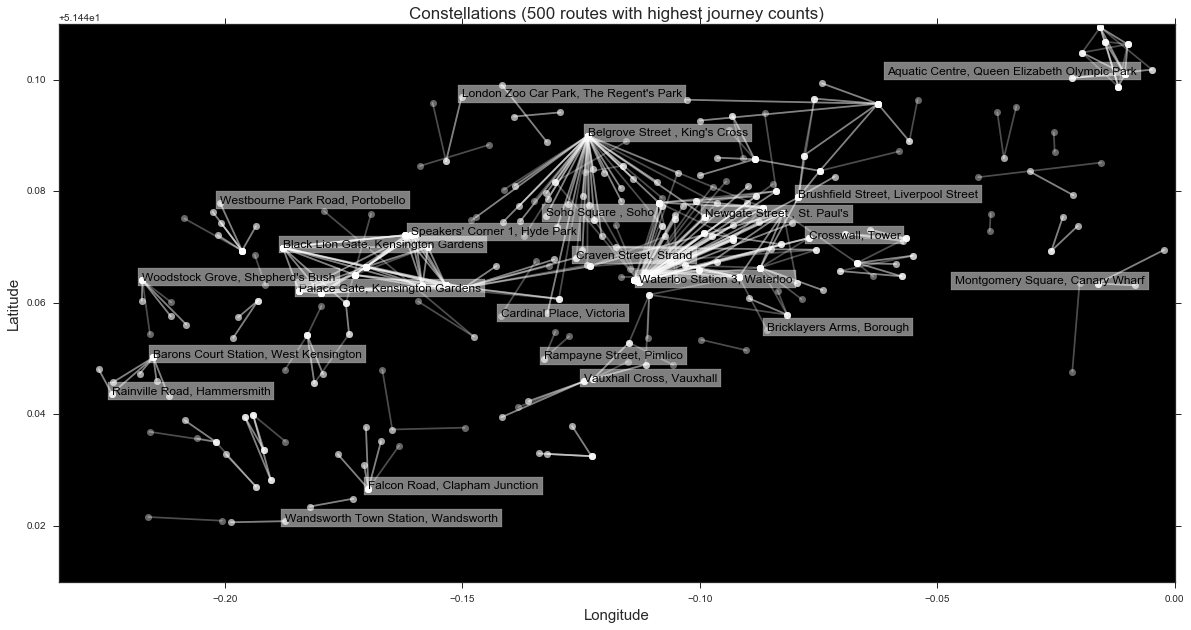

In [87]:
figure, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_axis_bgcolor('black')
plt.xlim(-0.235, 0)
plt.ylim(51.45, 51.55)
startlabels = [0,4,29,32,38,113,150,163,266,312,366,379,384,386,401,438,455,460,470,475,481,492,526]
for i in range(527):
        row = journeyCounts.iloc[i]
        count = row.JourneyCount
        ax.add_line(Line2D([row.long_x,row.long_y],[row.lat_x, row.lat_y], color="white", alpha=0.3))
        ax.plot(row.long_x, row.lat_x, 'wo', alpha=0.4)
        ax.plot(row.long_y, row.lat_y, 'wo', alpha=0.4)
        if i in startlabels:
            x = row.long_x
            y = row.lat_x
            if i == 492:
                x = x - 0.05
            elif i == 366:
                x = x - 0.03
            t = ax.text(x, y, "%s" % (row["name_x"]), color="black") 
            t.set_bbox(dict(color='white', alpha=0.5))        
        #t = ax.text(row.long_y, row.lat_y, "%d %s" % (i+1, row["name_y"]), color="black") 
        #t.set_bbox(dict(color='white', alpha=0.5))
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15) 
plt.title("Constellations (500 routes with highest journey counts)", fontsize=17)
plt.show()

In [101]:
startstations = pd.DataFrame(journeys.groupby("StartStationId").agg({"RentalId" : pd.Series.count}).to_records())
startstations.rename(columns={'StartStationId':'StationId'}, inplace=True)
endstations = pd.DataFrame(journeys.groupby("EndStationId").agg({"RentalId" : pd.Series.count}).to_records())
endstations.rename(columns={'EndStationId':'StationId'}, inplace=True)
allstations = startstations.append(endstations)

In [102]:
stationJourneyCounts = pd.DataFrame(allstations.groupby("StationId").agg({"RentalId" : pd.Series.sum}).to_records())
stationJourneyCounts = pd.merge(stationJourneyCounts, stations, left_on="StationId", right_on="id")
stationJourneyCounts.rename(columns={'RentalId':'JourneyCount'}, inplace=True)
stationJourneyCounts = stationJourneyCounts.sort_values(by="JourneyCount", ascending=False)
sumJourneyCounts = float(stationJourneyCounts.JourneyCount.sum())
stationJourneyCounts["%"] = stationJourneyCounts.JourneyCount.apply(lambda x : x/sumJourneyCounts)
stationJourneyCounts = stationJourneyCounts.sort_values(by="JourneyCount", ascending=False)

In [103]:
stationJourneyCounts.head()

,StationId,JourneyCount,id,name,lat,long,%
13,14.0,180066,14,"Belgrove Street , King's Cross",51.529944,-0.123617,0.009578
187,191.0,152578,191,"Hyde Park Corner, Hyde Park",51.503118,-0.153521,0.008116
151,154.0,148079,154,"Waterloo Station 3, Waterloo",51.503792,-0.112824,0.007877
293,303.0,120098,303,"Albert Gate, Hyde Park",51.502954,-0.158456,0.006388
297,307.0,118196,307,"Black Lion Gate, Kensington Gardens",51.509908,-0.187843,0.006287


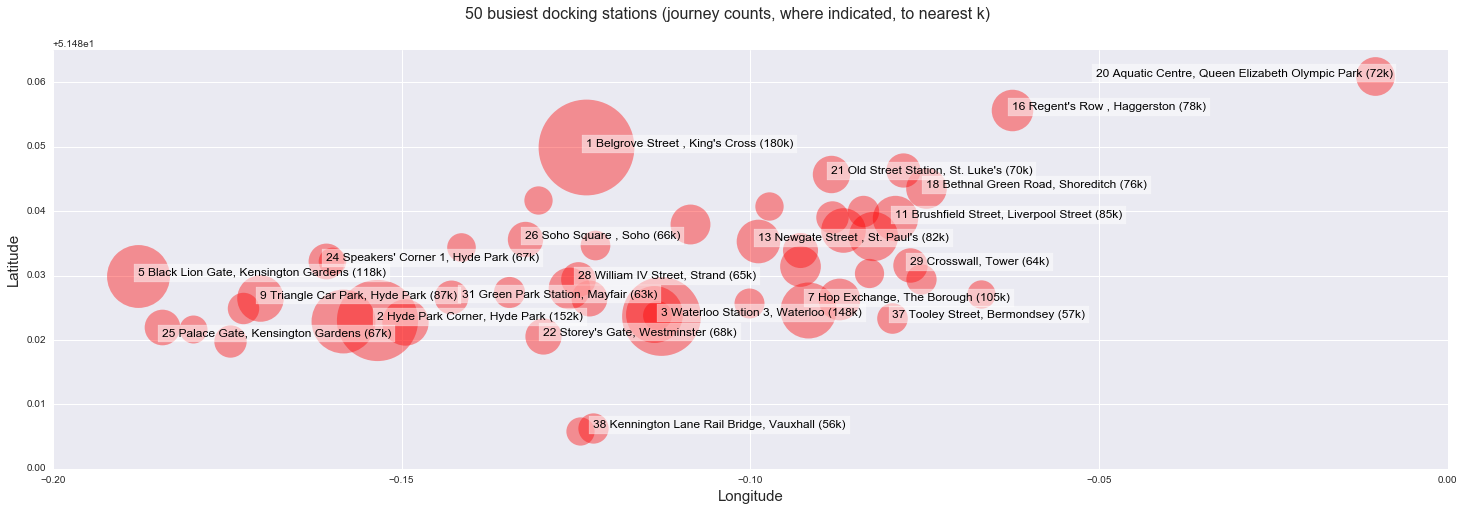

In [107]:
sns.set()
figure, ax = plt.subplots(1,1, figsize=(25,7.5))
plt.xlim(-0.2, 0)
plt.ylim(51.48, 51.545)
for i in range(50):
        row = stationJourneyCounts.iloc[i]
        percentage = row["%"]
        ax.plot(row.long, row.lat, 'ro', markersize=percentage*10000, alpha=0.4)
        #t = ax.text(row.long-0.0005, row.lat, str(i+1), color="white") 
        #t = ax.text(row.long-(0.001*i), row.lat+(0.001*i), row["name"], color="white") 
        #t.set_bbox(dict(color='black', alpha=0.8))
for i in [0,1,2,4,6,8,10,12,15,17,19,20,21,23,24,25,27,28,30,36,37]:
        row = stationJourneyCounts.iloc[i]
        count = row.JourneyCount/1000.
        y = row.lat
        x = row.long
        if i == 6:
            y = y + 0.0015
        elif i == 24:
            y = y - 0.0015
        elif i == 30:
            x = x + 0.0015
        elif i == 19:
            x = x - 0.04
        #t = ax.text(row.long-0.0005, row.lat, str(i+1), color="white") 
        t = ax.text(x, y, "%d %s (%dk)" % (i+1, row["name"], count), color="black") 
        t.set_bbox(dict(color='white', alpha=0.5))
plt.suptitle("50 busiest docking stations (journey counts, where indicated, to nearest k)", fontsize=16)
plt.xlabel("Longitude", fontsize=15)
plt.ylabel("Latitude", fontsize=15)
plt.show()

In [105]:
movedBikes = journeys[journeys.EndStationId != journeys.NextStartStationId]

In [106]:
movedBikes.shape

(833971, 22)

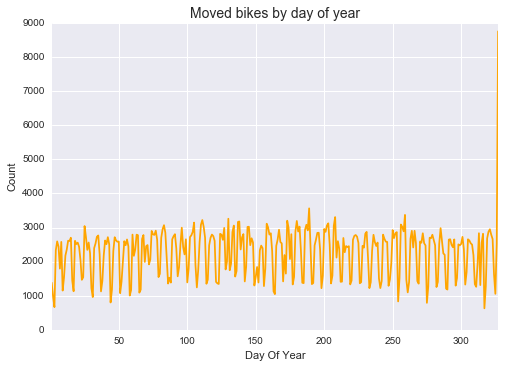

In [108]:
plotdata = movedBikes[["DayOfYear", "Duration"]].groupby(["DayOfYear"]).count()
figure, ax = plt.subplots(1,1)
ax.plot(plotdata.index.values, plotdata.Duration, color='orange')
plt.xlabel("Day Of Year")
plt.ylabel("Count")
plt.xlim(1, max(plotdata.index.values))
plt.title("Moved bikes by day of year", fontsize=14)
#plt.gca().text(85, 5, "31-03-2016", fontsize=10) 
plt.show() 

In [109]:
plotdata[plotdata.Duration > 7000] #23 Nov (southern rail strike)    

,Duration
DayOfYear,
327,8752


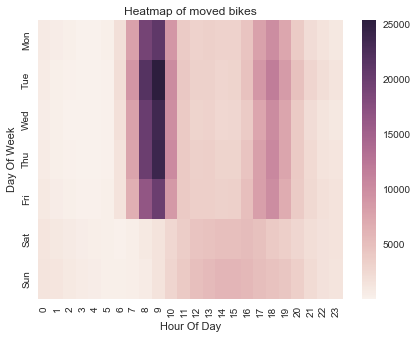

In [110]:
plotdata = movedBikes[["DayOfWeek", "HourOfDay", "Duration"]].groupby(["DayOfWeek","HourOfDay"]).count()
fig = plt.figure(figsize=(15,5))    
ax = fig.add_subplot(121)
axes = sns.heatmap(plotdata.unstack(), fmt="d", ax=ax)
plt.xlabel('Hour Of Day')
plt.ylabel('Day Of Week')
axes.yaxis.set_ticklabels(["Sun","Sat","Fri","Thu","Wed","Tue","Mon"])
axes.xaxis.set_ticklabels(range(0,24))
plt.title("Heatmap of moved bikes")
plt.show()

In [111]:
foo = pd.DataFrame(movedBikes.groupby(["EndStationId","NextStartStationId"]).agg({"RentalId" : pd.Series.count}).to_records())

In [112]:
foo.sort_values(by="RentalId", ascending=False).head()

,EndStationId,NextStartStationId,RentalId
9816,66.0,546.0,6328
9580,66.0,67.0,4505
73094,579.0,374.0,2499
10949,71.0,557.0,1912
60532,427.0,374.0,1590


In [113]:
bar = pd.DataFrame(movedBikes.groupby("EndStationId").agg({"RentalId" : pd.Series.count}).to_records())

In [114]:
bar.sort_values(by="RentalId", ascending=False).head()

,EndStationId,RentalId
363,374.0,31604
64,66.0,19055
190,194.0,16776
69,71.0,11009
222,228.0,10537


In [115]:
print("%s" %(stations[stations.id == 374].name.values[0]))
print("%s" %(stations[stations.id == 66].name.values[0]))
print("%s" %(stations[stations.id == 194].name.values[0]))
print("%s" %(stations[stations.id == 71].name.values[0]))
print("%s" %(stations[stations.id == 228].name.values[0]))

Waterloo Station 1, Waterloo
Holborn Circus, Holborn
Hop Exchange, The Borough
Newgate Street , St. Paul's
St. James's Square, St. James's


In [116]:
# were these also the stations where the most bikes ended up? not entirely..
pd.DataFrame(
    knownJourneys.groupby("EndStationId").agg(
        {"RentalId" : pd.Series.count}).to_records()).sort_values(
            by="RentalId", ascending=False).head()

,EndStationId,RentalId
13,14.0,89235
187,191.0,75628
151,154.0,73008
190,194.0,60539
294,303.0,60119


In [117]:
pd.DataFrame(
    movedBikes[movedBikes.DayOfYear == 327].groupby( #Southern rail strike
        "EndStationId").agg({"RentalId" : pd.Series.count}).to_records()).sort_values(
            by="RentalId", ascending=False).head()

,EndStationId,RentalId
137,154.0,296
10,14.0,291
329,374.0,165
59,66.0,135
64,71.0,99


In [118]:
print("%s" %(stations[stations.id == 154].name.values[0]))
print("%s" %(stations[stations.id == 14].name.values[0]))
print("%s" %(stations[stations.id == 374].name.values[0]))
print("%s" %(stations[stations.id == 66].name.values[0]))
print("%s" %(stations[stations.id == 71].name.values[0]))

Waterloo Station 3, Waterloo
Belgrove Street , King's Cross
Waterloo Station 1, Waterloo
Holborn Circus, Holborn
Newgate Street , St. Paul's
